In [1]:
%matplotlib notebook
import os
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import astrotog
from copy import copy, deepcopy
import opsimsummary as oss
# I personally like this style.
sns.set_style('whitegrid')
# Easy to change context from `talk`, `notebook`, `poster`, `paper`.
sns.set_context('talk')

/Users/cnsetzer/miniconda3/envs/astrotog/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/cnsetzer/miniconda3/envs/astrotog/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/cnsetzer/miniconda3/envs/astrotog/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/cnsetzer/miniconda3/envs/astrotog/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [9]:
output_path = '/Users/cnsetzer/Documents/LSST/astrotog_output/rosswog_results/binomial_runs/'
output_dirs = os.listdir(output_path)

In [13]:
results = {}
for directory in output_dirs:
    if directory == '.DS_Store':
        continue
    else:
        name_split = re.split('_',directory)
        model = name_split[1]
        name = name_split[2]
        if re.search('minion',name) is not None:
            name += name_split[3]
        for string in name_split:
            if re.search('var', string) is not None:
                name += string
                
        if re.search('pontus2502',name) is not None and re.search('_2_',directory) is not None:
            name += '_2'
            
        results[name] = {}
        results[name][model] = {}
        results[name][model]['data'] = {}
        results[name][model]['data']['observations'] = pd.read_csv(output_path + directory +'/observations.csv',index_col=0)
        results[name][model]['data']['parameters'] = pd.read_csv(output_path + directory +'/modified_parameters.csv',index_col=0)
        results[name][model]['data']['coadded observations'] = pd.read_csv(output_path + directory +'/coadded_observations.csv',index_col=0)
        results[name][model]['data']['other observations'] = pd.read_csv(output_path + directory +'/other_observations.csv',index_col=0)
        results[name][model]['data']['scolnic detections'] = pd.read_csv(output_path + directory +'/scolnic_detections.csv',index_col=0)
        results[name][model]['number scolnic'] = len(results[name][model]['data']['scolnic detections']['transient_id'].unique())

/Users/cnsetzer/miniconda3/envs/astrotog/lib/python3.5/site-packages/numpy/lib/arraysetops.py:518: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [14]:
fiducial_scolnic = 74.5

In [15]:
sc_raw_cadence_numbers = []
sc_cadence =[]

rw_raw_cadence_numbers = []
rw_cadence =[]
for key in results.keys():
    for key2 in results[key].keys():
        if key2 == 'scolnic' and re.search('var',key) is None:
            sc_cadence.append(key)
            sc_raw_cadence_numbers.append(results[key][key2]['number scolnic'])
        elif key2 == 'rosswog' and re.search('var',key) is None:
            rw_cadence.append(key)
            rw_raw_cadence_numbers.append(results[key][key2]['number scolnic'])
        elif re.search('var', key) is not None:
            var
if len(sc_cadence ) > 0:
    sc_cadence_numbers = deepcopy(sc_raw_cadence_numbers)
    print(list(zip(sc_cadence, sc_raw_cadence_numbers)))
    
if len(rw_cadence) > 0:
    rw_cadence_numbers = deepcopy(rw_raw_cadence_numbers)
    print(list(zip(rw_cadence, rw_raw_cadence_numbers)))

[('mothra2049', 49), ('colossus2665', 48), ('kraken2036', 54), ('kraken2042', 48), ('kraken2026', 53), ('pontus2002', 47), ('kraken2035', 43), ('baseline2018a', 48), ('mothra2045', 34), ('minion1016sqlite', 33), ('colossus2664', 45), ('colossus2667', 68), ('pontus2502_2', 31), ('nexus2097', 48), ('kraken2044', 64), ('pontus2502', 2), ('minion1016recalc', 45), ('pontus2489', 54), ('minion1016descdithersv4', 40)]


In [16]:
# sort based on number detected
if len(sc_cadence ) > 0:
    sc_sorted_cadences = [x for _, x in sorted(zip(sc_raw_cadence_numbers,sc_cadence), key=lambda pair: pair[0])]
    sc_raw_cadence_numbers.sort()
    sc_sorted_cadence_numbers = sc_raw_cadence_numbers

if len(rw_cadence ) > 0:
    rw_sorted_cadences = [x for _, x in sorted(zip(rw_raw_cadence_numbers,rw_cadence), key=lambda pair: pair[0])]
    rw_raw_cadence_numbers.sort()
    rw_sorted_cadence_numbers = rw_raw_cadence_numbers

<IPython.core.display.Javascript object>


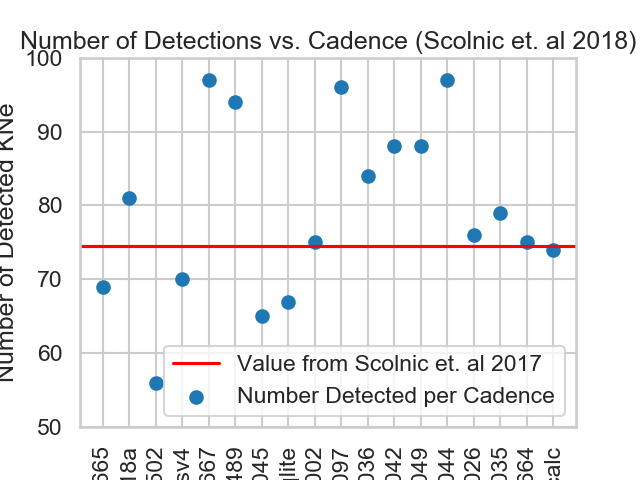

In [12]:
fig = plt.figure()
plt.scatter(sc_cadence, sc_cadence_numbers)
plt.ylim([50, 100])
plt.axhline(fiducial_scolnic,color='r')
plt.xticks(rotation='vertical')
plt.title('Number of Detections vs. Cadence (Scolnic et. al 2018)')
plt.ylabel('Number of Detected KNe')
plt.legend(['Value from Scolnic et. al 2017','Number Detected per Cadence'])
plt.show()
plt.savefig('Unsorted_raw_counts.pdf',bbox_inches='tight')

<IPython.core.display.Javascript object>


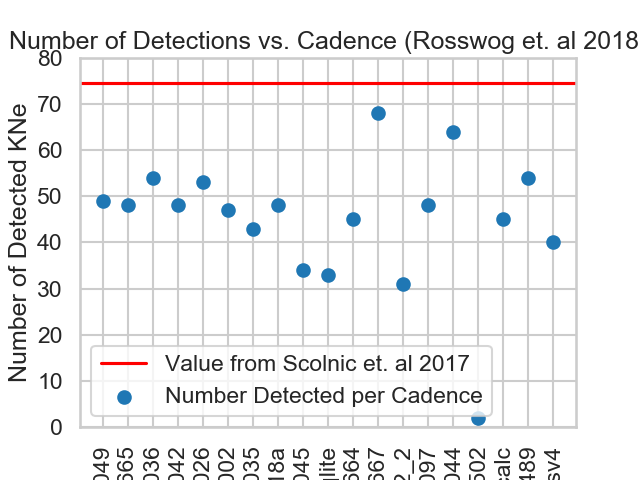

In [17]:
fig = plt.figure()
plt.scatter(rw_cadence, rw_cadence_numbers)
plt.ylim([0, 80])
plt.axhline(fiducial_scolnic,color='r')
plt.xticks(rotation='vertical')
plt.title('Number of Detections vs. Cadence (Rosswog et. al 2018)')
plt.ylabel('Number of Detected KNe')
plt.legend(['Value from Scolnic et. al 2017','Number Detected per Cadence'])
plt.show()
plt.savefig('Unsorted_raw_counts.pdf',bbox_inches='tight')

<IPython.core.display.Javascript object>


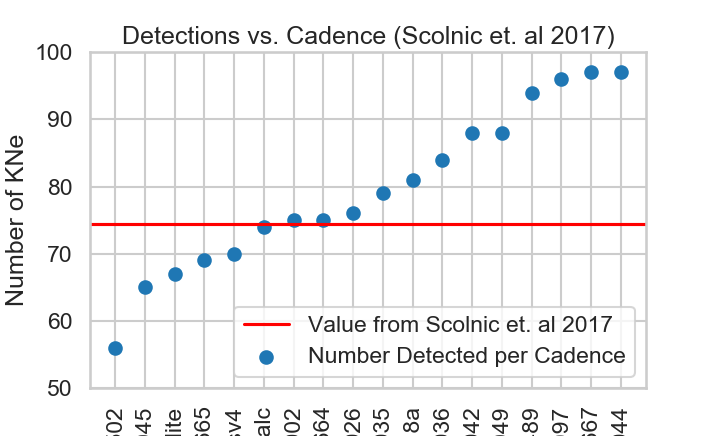

In [15]:
fig = plt.figure()
plt.scatter(sc_sorted_cadences, sc_sorted_cadence_numbers)
plt.ylim([50, 100])
plt.axhline(fiducial_scolnic,color='r')
plt.xticks(rotation='vertical')
plt.title('Detections vs. Cadence (Scolnic et. al 2017)')
plt.ylabel('Number of KNe')
plt.legend(['Value from Scolnic et. al 2017','Number Detected per Cadence'])
plt.show()
plt.savefig('sorted_scolnic_counts_by_cadence.pdf',bbox_inches='tight')

<IPython.core.display.Javascript object>


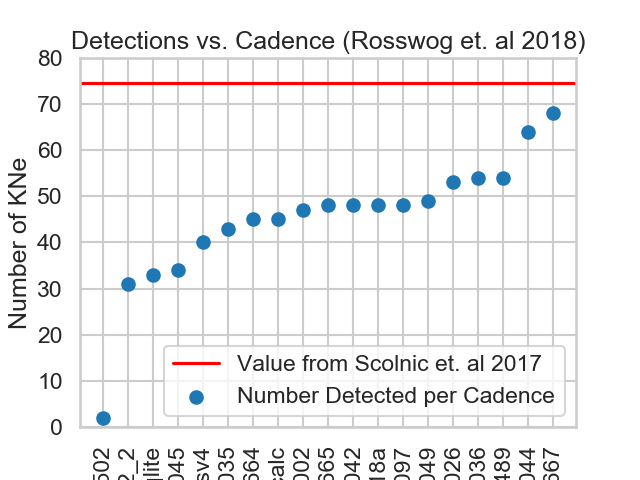

In [18]:
fig = plt.figure()
plt.scatter(rw_sorted_cadences, rw_sorted_cadence_numbers)
plt.ylim([0, 80])
plt.axhline(fiducial_scolnic,color='r')
plt.xticks(rotation='vertical')
plt.title('Detections vs. Cadence (Rosswog et. al 2018)')
plt.ylabel('Number of KNe')
plt.legend(['Value from Scolnic et. al 2017','Number Detected per Cadence'], loc=4)
plt.show()
plt.savefig('Sorted_rosswog_counts.pdf',bbox_inches='tight')

In [16]:
def redshift_distribution(param_df):
    z_min = 0.0
    z_max = 0.5
    bin_size = 0.025
    n_bins = int(round((z_max-z_min)/bin_size))
    all_zs = list(param_df['true_redshift'])
    is_detected = not param_df[param_df['detected']].empty
    if is_detected is False:
        detect_zs = []
        max_depth_detect = []
    else:
        detect_zs = list(param_df[param_df['detected']]['true_redshift'])
        max_depth_detect = list(param_df[param_df['true_redshift'] <= max(detect_zs)]['true_redshift'])

    total_eff = (len(detect_zs)/len(all_zs))*100
    max_depth_eff = (len(detect_zs)/len(max_depth_detect))*100

    print('The redshift range of all sources is {0:.4f} to {1:.4f}.'.format(min(all_zs), max(all_zs)))
    print('The redshift range of the detected sources is {0:.4f} to {1:.4f}.'.format(min(detect_zs), max(detect_zs)))
    print('There are {0} detected transients out of {1}, which is an efficiency of {2:2.2f}%  of the total simulated number.'.format(len(detect_zs), len(all_zs), total_eff))
    print('However, this is an efficiency of {0:2.2f}%  of the total that occur within the range that was detected by {1}.'.format(max_depth_eff, 'lsst'))
    # Create the histogram
    N_z_dist_fig = plt.figure()
    plt.hist(x=all_zs, bins=n_bins, range=(z_min, z_max), histtype='step', color='red', label='All Sources', linewidth=3.0)
    plt.hist(x=detect_zs, bins=n_bins, range=(z_min, z_max), histtype='stepfilled', edgecolor='blue', color='blue', alpha=0.3, label='Detected Sources', )
    # plt.tick_params(which='both', length=10, width=1.5)
    plt.yscale('log')
    plt.legend(loc=2)
    plt.xlabel('z')
    plt.ylabel(r'$N(z)$')
    plt.title('Redshift Distribution ({0:.3f} bins).'.format(bin_size, max_depth_eff))
    return N_z_dist_fig


In [17]:
print(results.keys())

dict_keys(['pontus2002', 'mothra2045', 'colossus2667', 'kraken2042', 'kraken2026', 'nexus2097', 'colossus2664', 'minion1016sqlite', 'kraken2044', 'minion1016recalc', 'kraken2035', 'colossus2665', 'mothra2049', 'baseline2018a', 'pontus2489', 'pontus2502', 'kraken2036', 'minion1016descdithersv4'])


The redshift range of all sources is 0.0056 to 0.5000.
The redshift range of the detected sources is 0.0056 to 0.2326.
There are 56 detected transients out of 107282, which is an efficiency of 0.05%  of the total simulated number.
However, this is an efficiency of 0.36%  of the total that occur within the range that was detected by lsst.


<IPython.core.display.Javascript object>


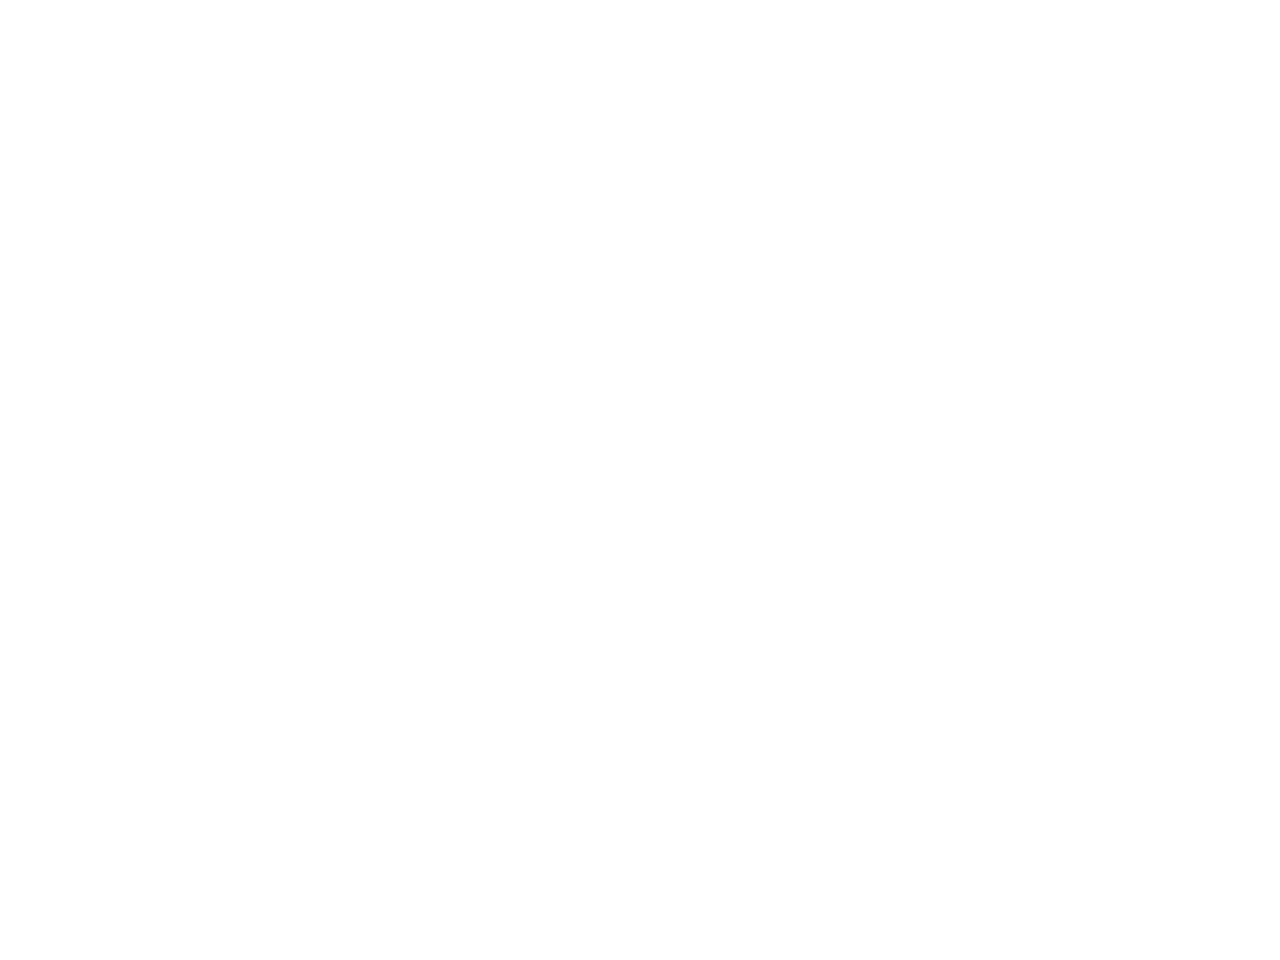

The redshift range of all sources is 0.0056 to 0.5000.
The redshift range of the detected sources is 0.0056 to 0.2056.
There are 97 detected transients out of 107281, which is an efficiency of 0.09%  of the total simulated number.
However, this is an efficiency of 0.87%  of the total that occur within the range that was detected by lsst.


<IPython.core.display.Javascript object>


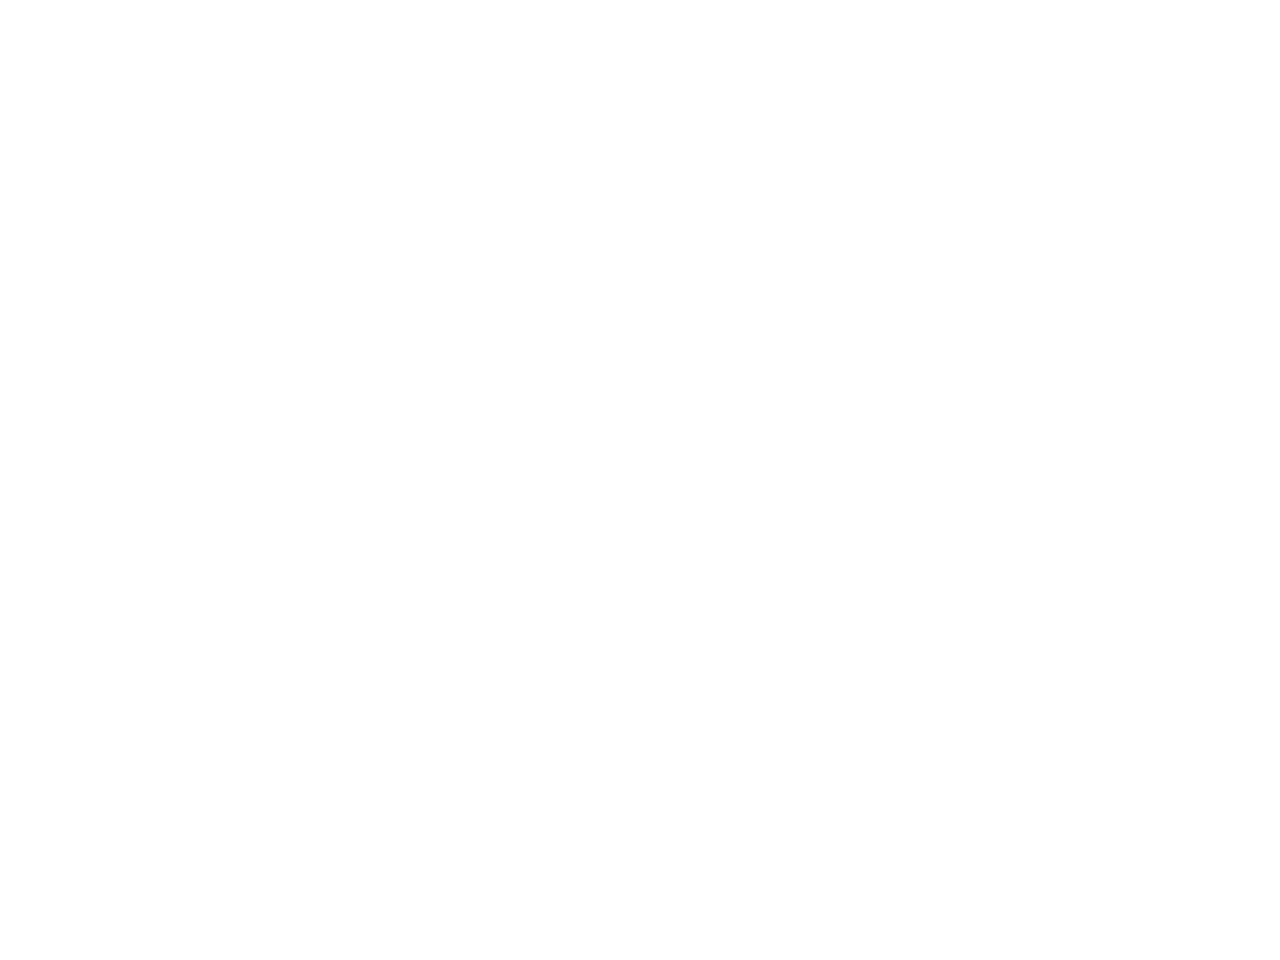

The redshift range of all sources is 0.0056 to 0.5000.
The redshift range of the detected sources is 0.0068 to 0.3277.
There are 97 detected transients out of 145950, which is an efficiency of 0.07%  of the total simulated number.
However, this is an efficiency of 0.19%  of the total that occur within the range that was detected by lsst.


<IPython.core.display.Javascript object>


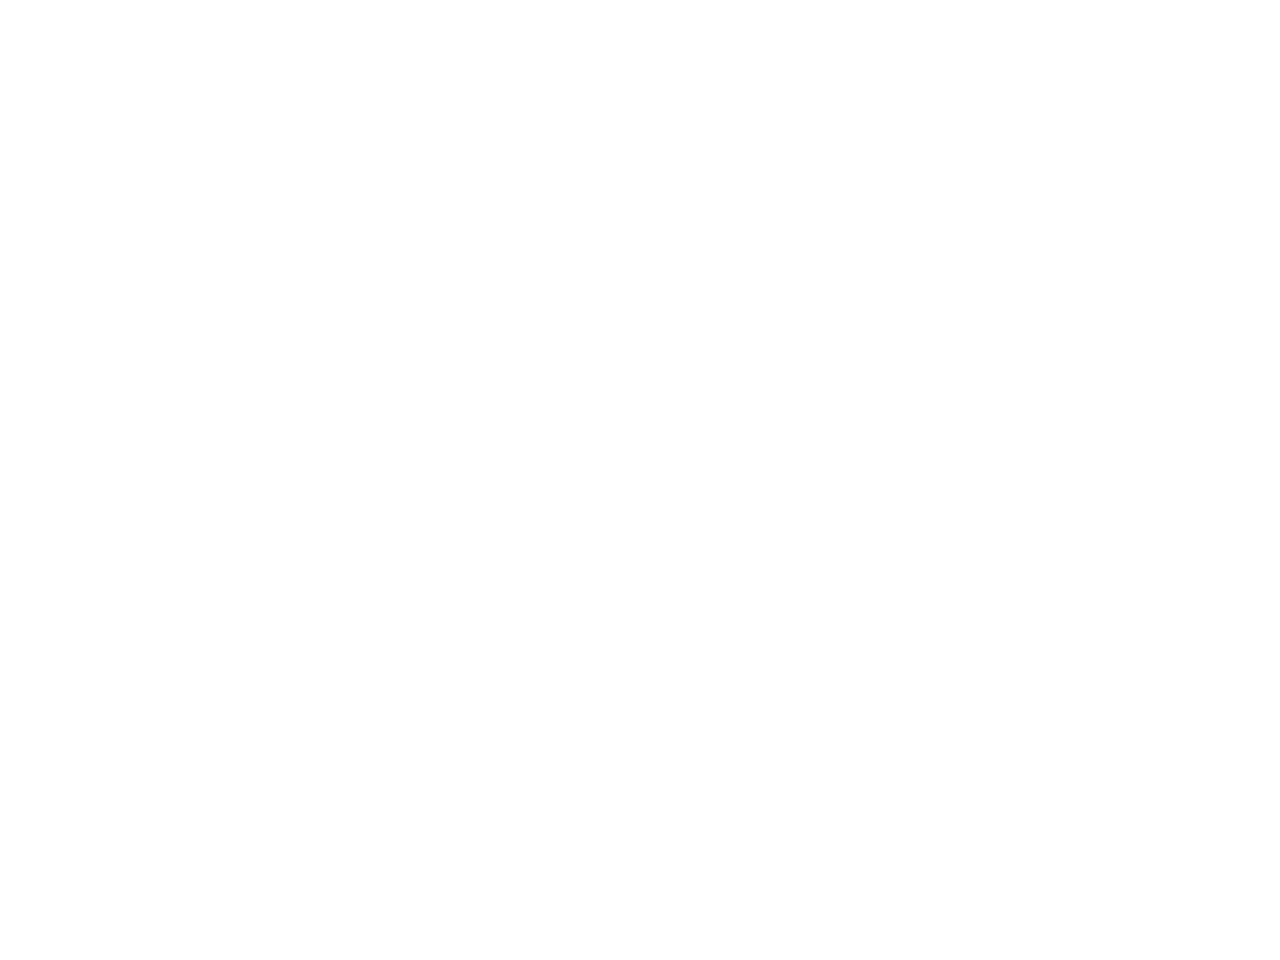

The redshift range of all sources is 0.0056 to 0.5000.
The redshift range of the detected sources is 0.0056 to 0.3254.
There are 76 detected transients out of 107281, which is an efficiency of 0.07%  of the total simulated number.
However, this is an efficiency of 0.20%  of the total that occur within the range that was detected by lsst.


<IPython.core.display.Javascript object>


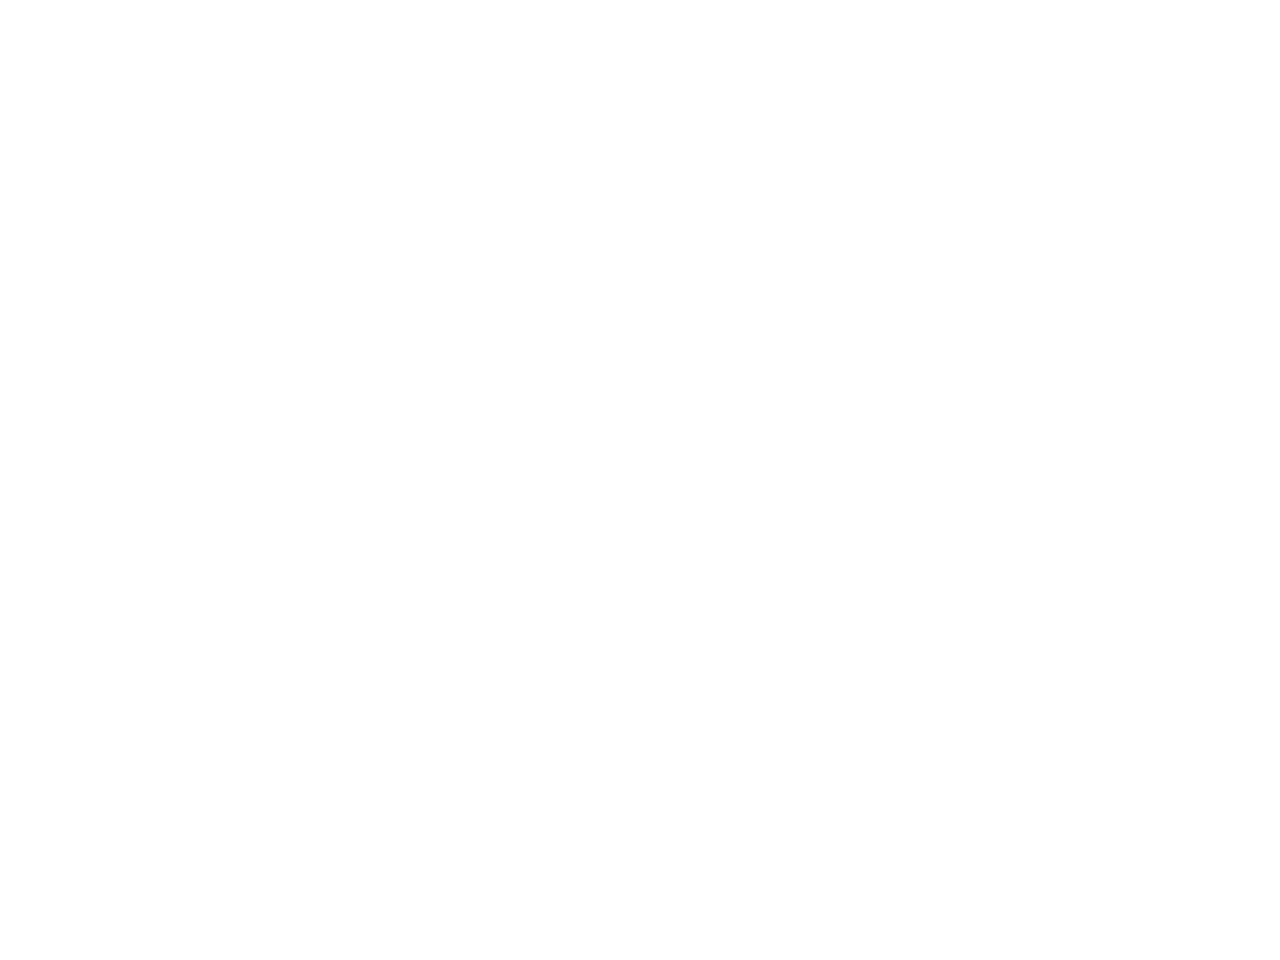

In [24]:
nz_fig_worst = redshift_distribution(results['pontus2502']['scolnic']['data']['parameters'])
nz_fig_best1 = redshift_distribution(results['colossus2667']['scolnic']['data']['parameters'])
nz_fig_best2 = redshift_distribution(results['kraken2044']['scolnic']['data']['parameters'])
nz_fig_baseline = redshift_distribution(results['kraken2026']['scolnic']['data']['parameters'])

nz_fig_worst.savefig('scolnic_redshift_distribution_worst.pdf', bbox_inches='tight')
plt.close(nz_fig_worst)
nz_fig_baseline.savefig('scolnic_redshift_distribution_baseline.pdf', bbox_inches='tight')
plt.close(nz_fig_baseline)
nz_fig_best1.savefig('scolnic_redshift_distribution_best1.pdf', bbox_inches='tight')
plt.close(nz_fig_best1)
plt.close(nz_fig_baseline)
nz_fig_best2.savefig('scolnic_redshift_distribution_best2.pdf', bbox_inches='tight')
plt.close(nz_fig_best2)


## Plot lightcurves

In [42]:
detect_df_best = results['colossus2667']['rosswog']['data']['scolnic detections']

In [43]:
detect_df_best['transient_id'].unique()

array([   135,    557,   1385,   6272,  12396,  17779,  19858,  21114,
        21601,  21852,  26250,  26859,  28606,  29330,  30093,  30103,
        31831,  32497,  33874,  34020,  34841,  36608,  42905,  42918,
        45092,  45232,  46229,  47793,  52565,  53601,  55470,  56381,
        56611,  58496,  58903,  59476,  62355,  62626,  63118,  65315,
        68820,  72455,  73222,  74749,  75676,  77500,  77578,  77786,
        78613,  78946,  79653,  82070,  84442,  86043,  87087,  88170,
        89352,  89912,  95927,  98676, 100555, 100825, 100905, 102879,
       103852, 106061, 106090, 106475])

In [51]:
lc_df = detect_df_best.query('transient_id == 55470')
print(lc_df)

     transient_id           mjd bandfilter  instrument_magnitude  \
521         55470  62600.257697          i             20.064483   
522         55470  62602.263160          i             20.630750   
523         55470  62603.159109          i             20.946053   
524         55470  62614.278495          i             60.054990   
525         55470  62615.225069          i             25.317344   
526         55470  62616.207431          i             60.054990   
527         55470  62601.243079          r             20.995489   
528         55470  62619.208553          r             60.594439   
529         55470  62621.214387          r             60.594439   
530         55470  62623.198681          r             26.699827   
531         55470  62604.182384          y             20.314502   
532         55470  62605.166238          y             20.631887   
533         55470  62606.195139          z             21.537289   
534         55470  62607.216968          z      

In [53]:
lc_df.query('bandfilter == \'z\'')

,transient_id,mjd,bandfilter,instrument_magnitude,instrument_mag_one_sigma,instrument_flux,instrument_flux_one_sigma,A_x,signal_to_noise,source_magnitude,...,extincted_mag_one_sigma,extincted_flux,extincted_flux_one_sigma,airmass,five_sigma_depth,lightcurve_phase,field_previously_observed,field_observed_after,coadded_night,alert
533,55470,62606.195139,z,21.537289,0.044853,1.549546e-15,6.401408e-17,0.258001,24.206327,21.244215,...,0.043428,1.600418e-15,6.401408e-17,1.100604,23.249686,8.988245,True,True,False,True
534,55470,62607.216968,z,21.901083,0.066496,1.108375e-15,6.788204e-17,0.258001,16.327949,21.671935,...,0.068286,1.079308e-15,6.788204e-17,1.061374,23.185987,10.010074,True,True,False,True
535,55470,62608.180116,z,22.172829,0.121282,8.629552e-16,9.639643e-17,0.258001,8.952149,22.101007,...,0.143969,7.269702e-16,9.639643e-17,1.123090,22.805222,10.973222,True,True,False,True
536,55470,62613.349873,z,25.648915,2.790995,3.511994e-17,9.027937e-17,0.258001,0.389014,24.583029,...,1.326187,7.391083e-17,9.027937e-17,1.379038,22.876403,16.142979,True,True,False,False


<IPython.core.display.Javascript object>


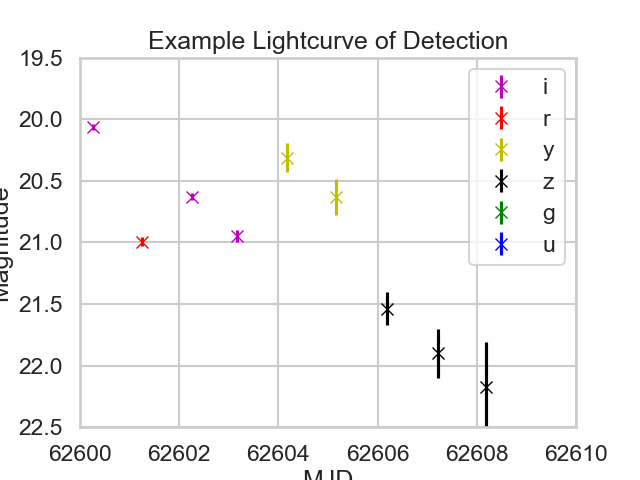

i
r
y
z
g
u


In [78]:
band_plots = []
fig = plt.figure()
for band in list(lc_df['bandfilter'].unique()):
    band_plots.append(lc_df.query('bandfilter == \'{}\''.format(band)))

    print(band)

colorlist= ['m','r','y','k','g','b']
    
for i in range(len(band_plots)):
    plt.errorbar(x=band_plots[i]['mjd'], y=band_plots[i]['instrument_magnitude'],yerr=3*band_plots[i]['instrument_mag_one_sigma'],fmt='x',color=colorlist[i])
    
plt.ylim(22.5, 19.5)
plt.xlim(62600, 62610)
plt.xlabel('MJD')
plt.ylabel('Magnitude')
plt.title('Example Lightcurve of Detection')
plt.legend(['i','r','y','z','g','u'], loc=1)

fig.savefig('example_detected_lightcurve.pdf', bbox_inches='tight')

## Parameter Plots

In [21]:
parameter_df=results['colossus2667']['rosswog']['data']['parameters']
parameter_df.columns

Index(['transient_id', 'true_redshift', 'obs_redshift', 'explosion_time',
       'max_time', 'ra', 'dec', 'peculiar_velocity', 'm_ej', 'v_ej', 'kappa',
       'observed', 'alerted', 'detected'],
      dtype='object')

<IPython.core.display.Javascript object>


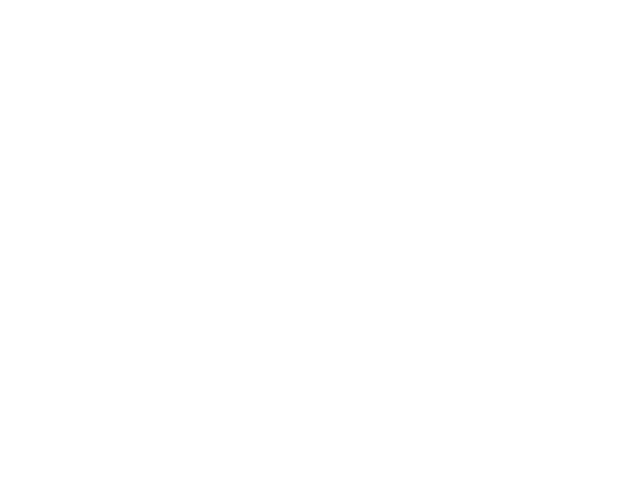

<IPython.core.display.Javascript object>


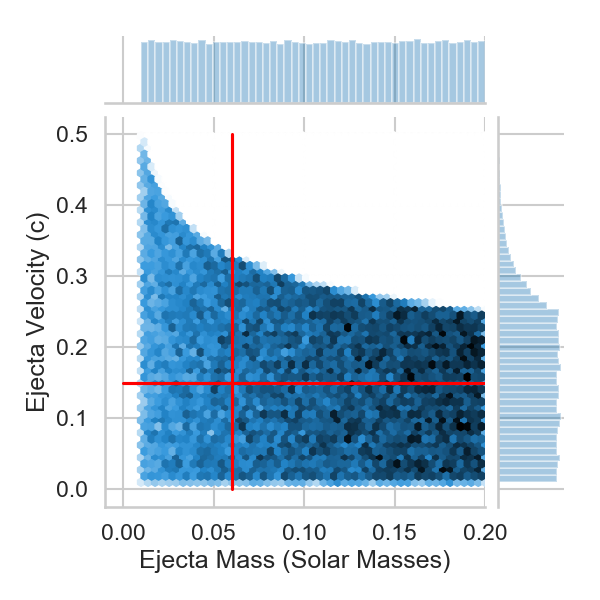

/Users/cnsetzer/miniconda3/envs/astrotog/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [34]:
param_fig = plt.figure()
g = (sns.jointplot('m_ej','v_ej',data = parameter_df, kind='hex').set_axis_labels('Ejecta Mass (Solar Masses)','Ejecta Velocity (c)'))
g.ax_joint.plot([0.06, 0.06], [0.0, 0.5], color='r')
g.ax_joint.plot([0.0, 0.2], [0.15, 0.15], color='r')
g.savefig('Rosswog_parameter_dist.pdf',bbox_inches='tight')

In [98]:
cadence_tabulated = pd.read_csv('cadence_information.csv', sep=';',index_col=0)

In [104]:
print(cadence_tabulated.columns)

Index(['total_wfd_u', 'total_wfd_g', 'total_wfd_r', 'total_wfd_i',
       'total_wfd_z', 'total_wfd_y', 'median_wfd_u', 'median_wfd_g',
       'median_wfd_r', 'median_wfd_i', 'median_wfd_z', 'median_visits_y',
       'median_open_shutter_fraction_per_night', 'foarea',
       'median_single_visit_depth_u_wfd', 'median_single_visit_depth_g_wfd',
       'median_single_visit_depth_r_wfd', 'median_single_visit_depth_i_wfd',
       'median_single_visit_depth_z_wfd', 'median_single_visit_depth_y_wfd',
       'total_filter_changes', 'median_filter_changes_per_night'],
      dtype='object')


#### Match cadence details with data

In [106]:
filter_change = []
for cad in sc_sorted_cadences:
    filter_change.append(cadence_tabulated.at[cad,'total_filter_changes'])

<IPython.core.display.Javascript object>


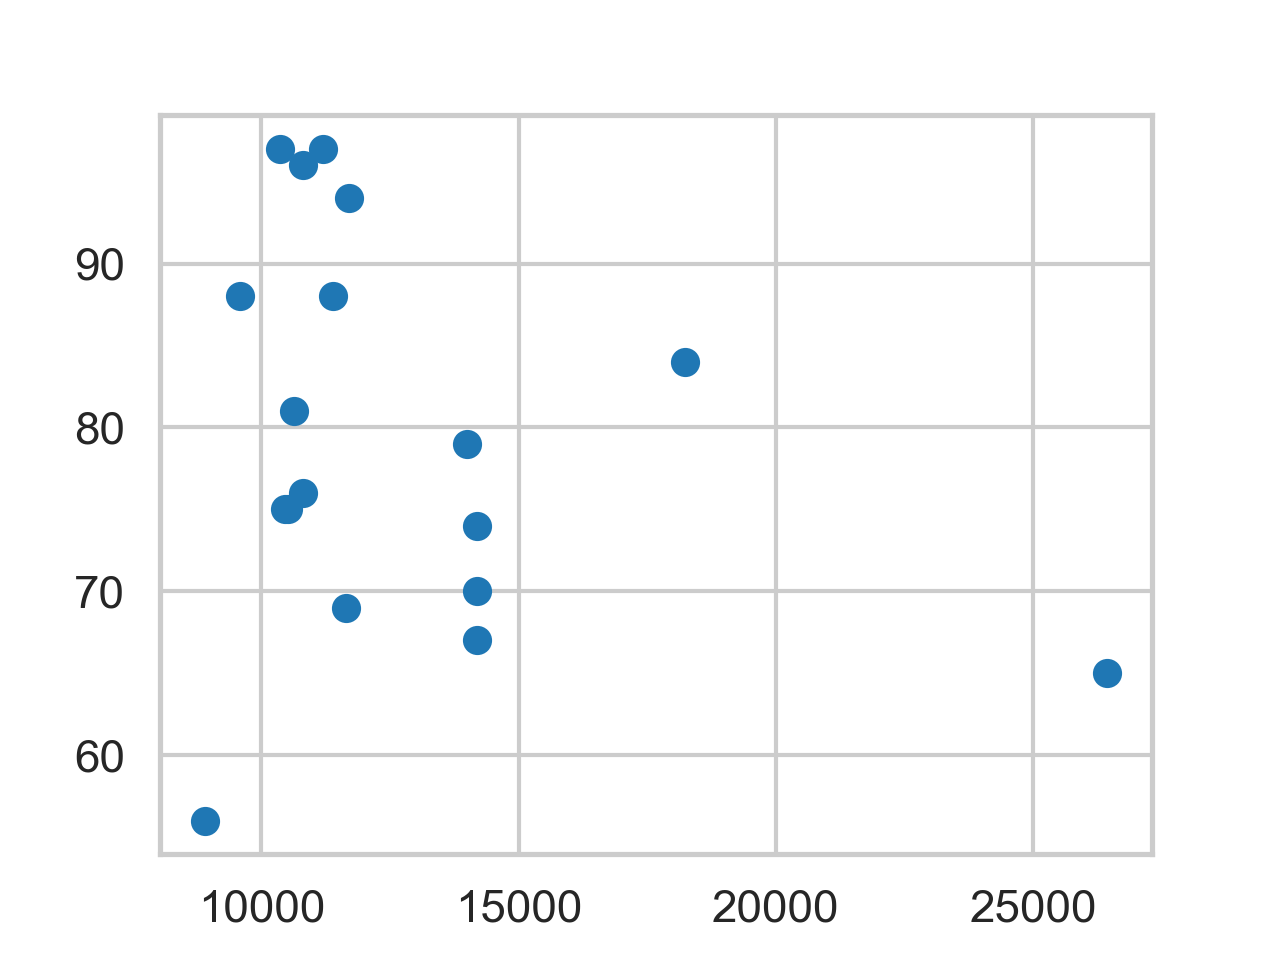

In [107]:
num_filter_fig = plt.figure()

plt.scatter(filter_change,sc_sorted_cadence_numbers)

In [2]:
from astrotog import top_level_classes as atopclass

/Users/cnsetzer/miniconda3/envs/astrotog/lib/python3.5/site-packages/astrotog/functions.py:7: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'nbAgg' by the following code:
  File "/Users/cnsetzer/miniconda3/envs/astrotog/lib/python3.5/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/cnsetzer/miniconda3/envs/astrotog/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/cnsetzer/miniconda3/envs/astrotog/lib/python3.5/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/cnsetzer/miniconda3/envs/astrotog/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/cnsetzer/miniconda3/envs/astrotog

In [3]:
check_transient4= atopclass.scolnic_kilonova('/Users/cnsetzer/Documents/LSST/kilonova_seds/scolnic/DECAMGemini_SED.txt')


<IPython.core.display.Javascript object>


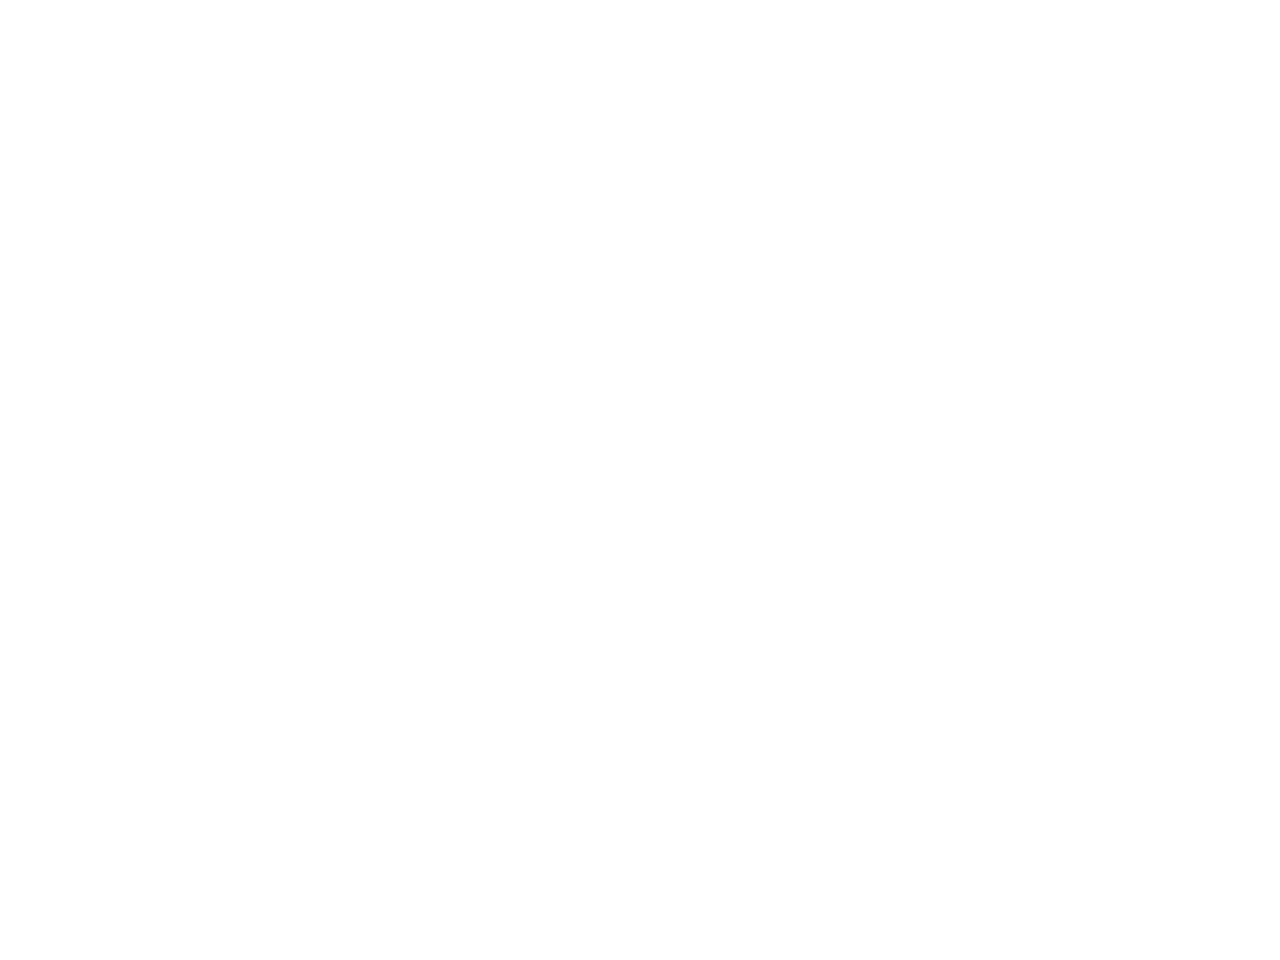

<IPython.core.display.Javascript object>


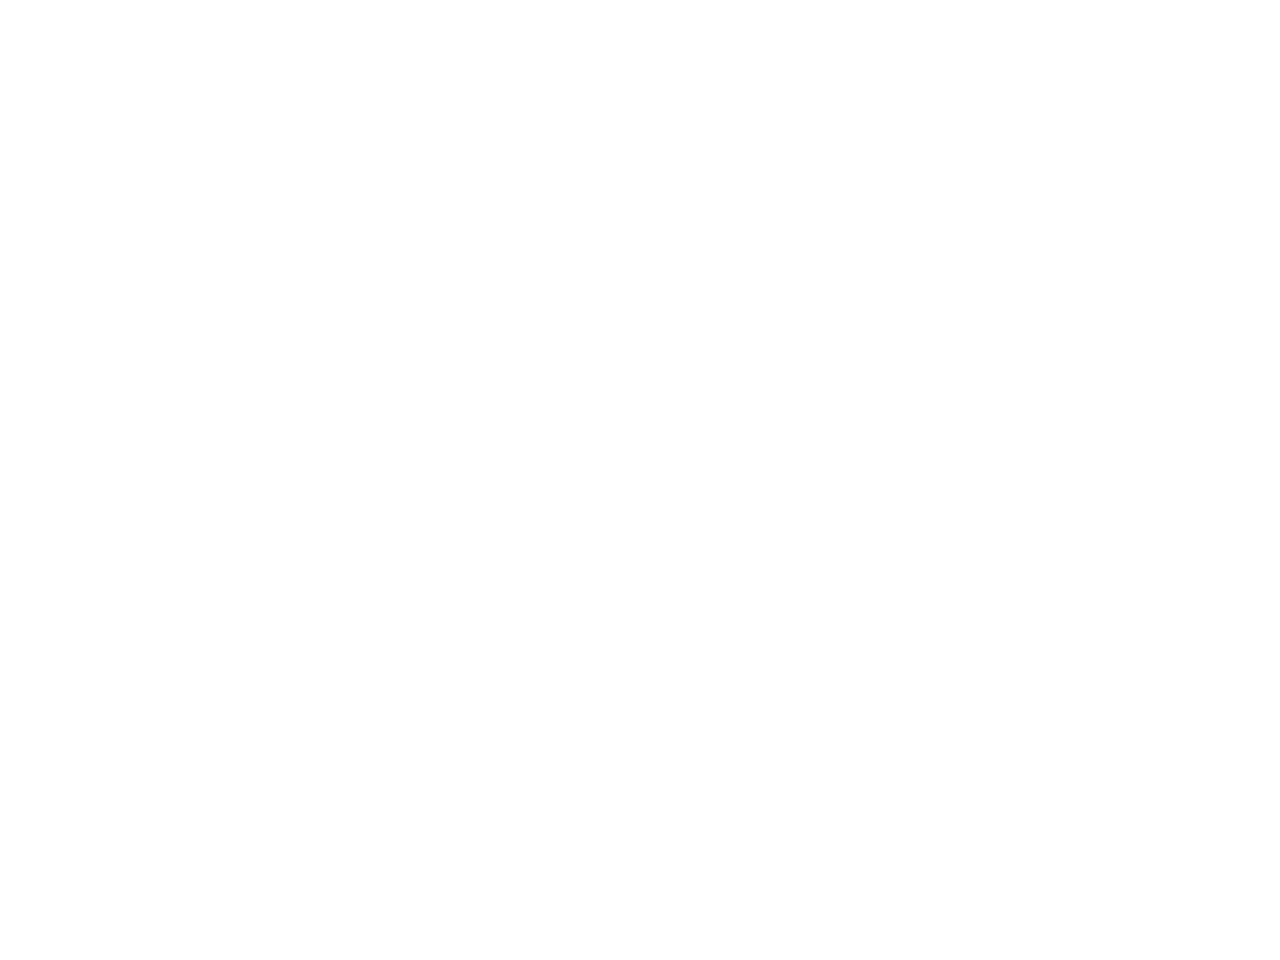

<IPython.core.display.Javascript object>


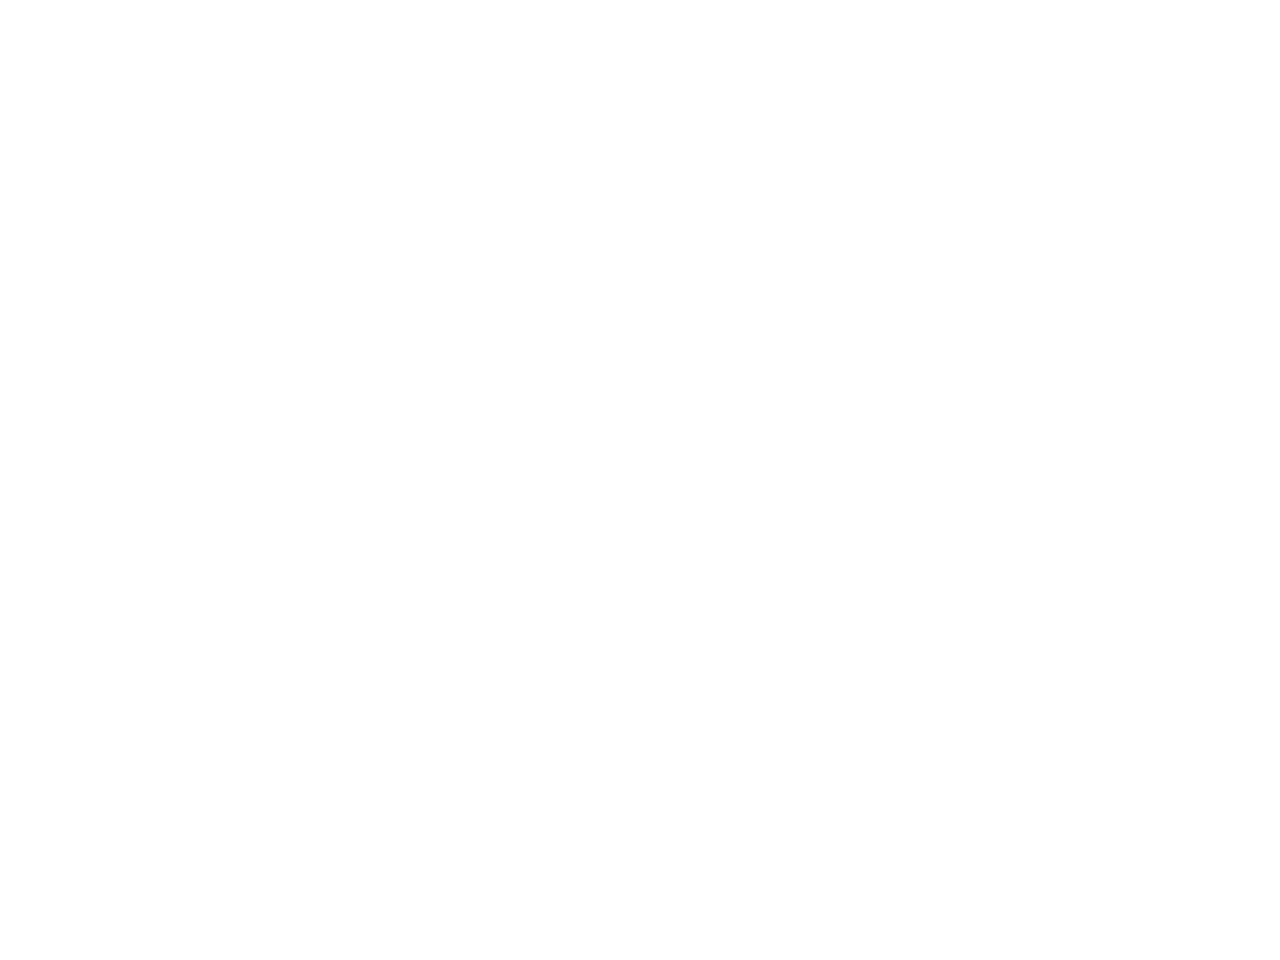

<IPython.core.display.Javascript object>


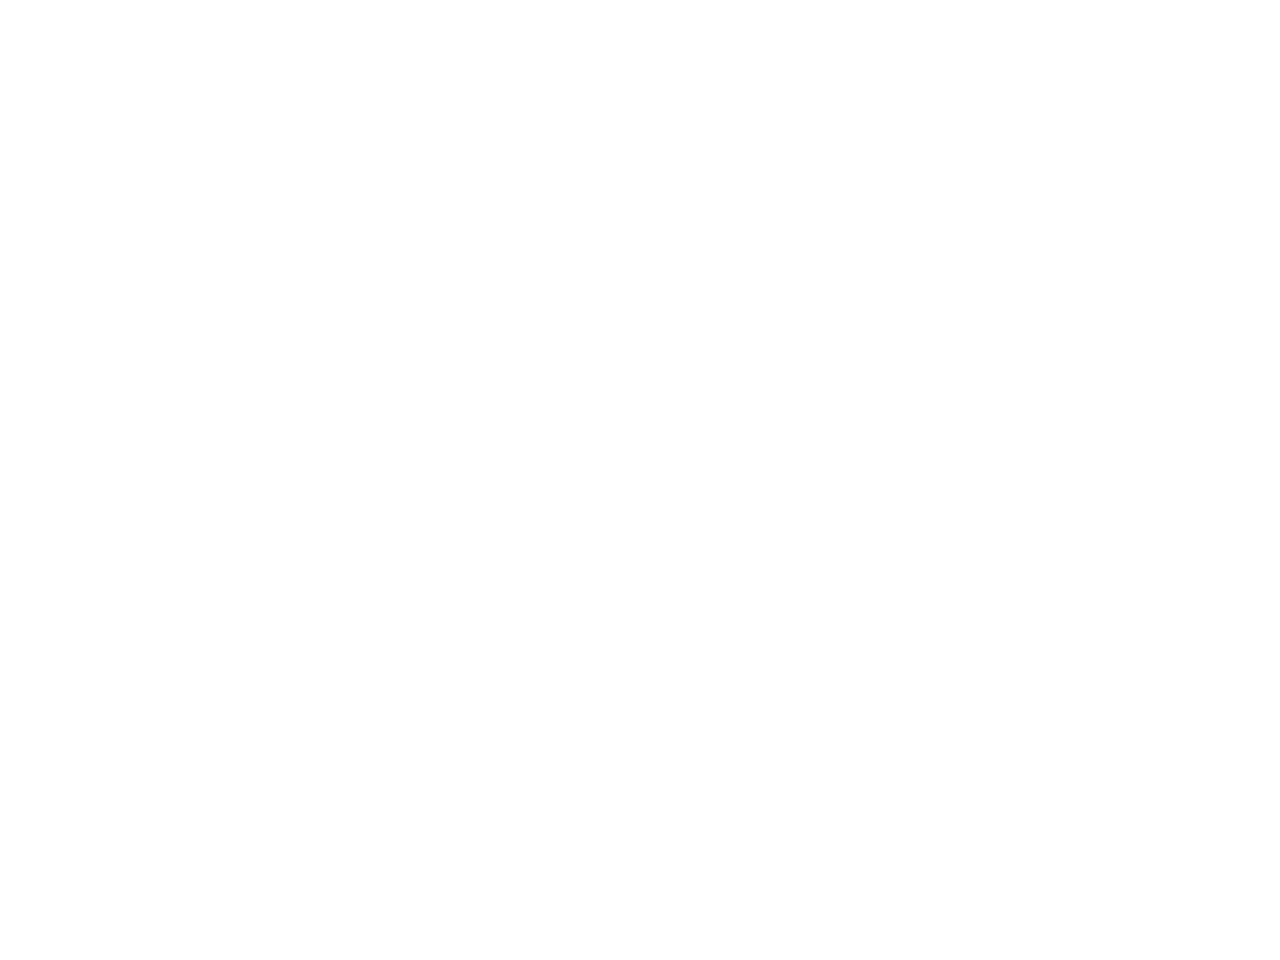

<IPython.core.display.Javascript object>


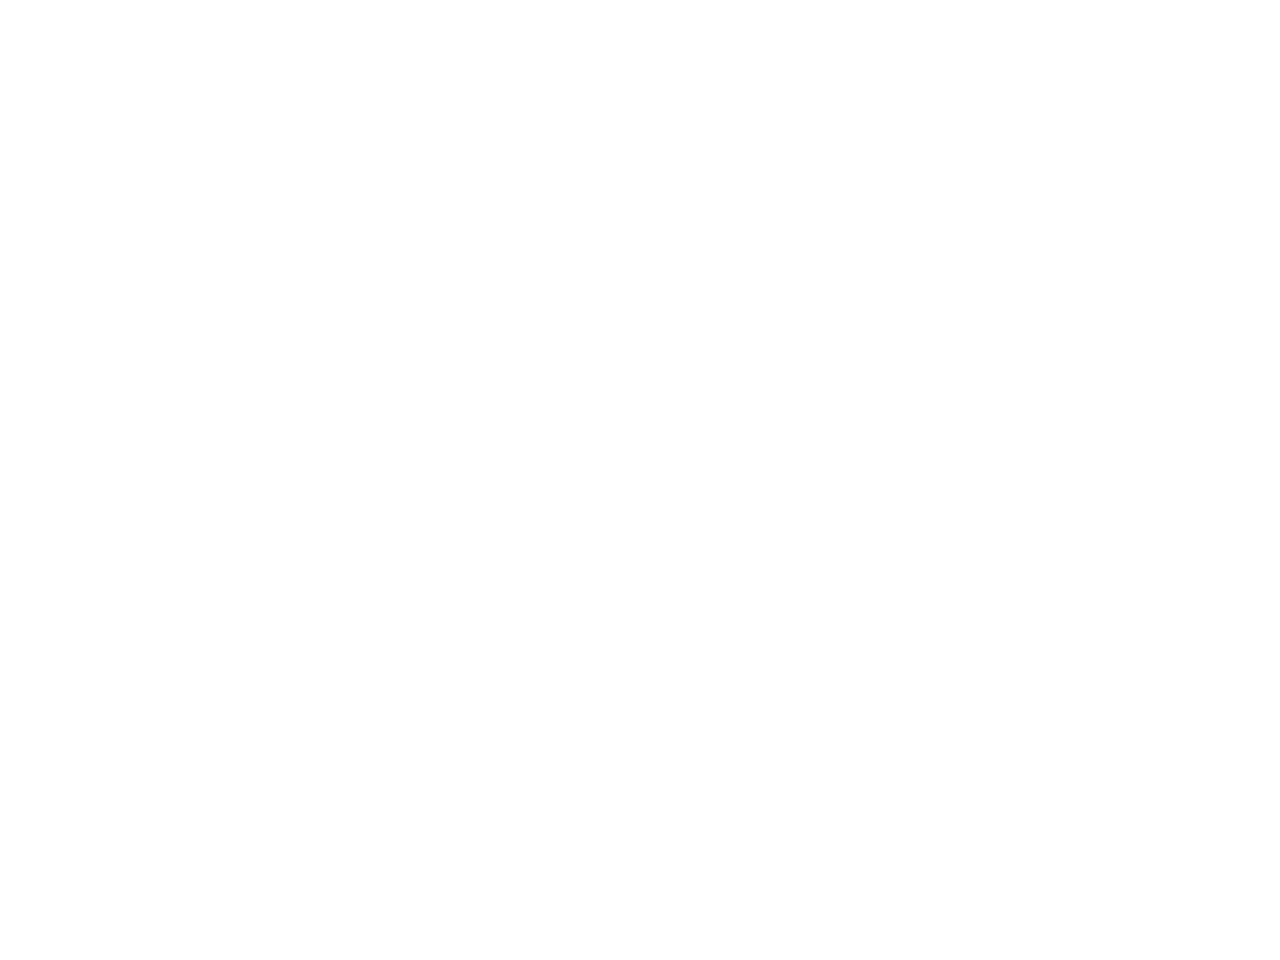

<IPython.core.display.Javascript object>


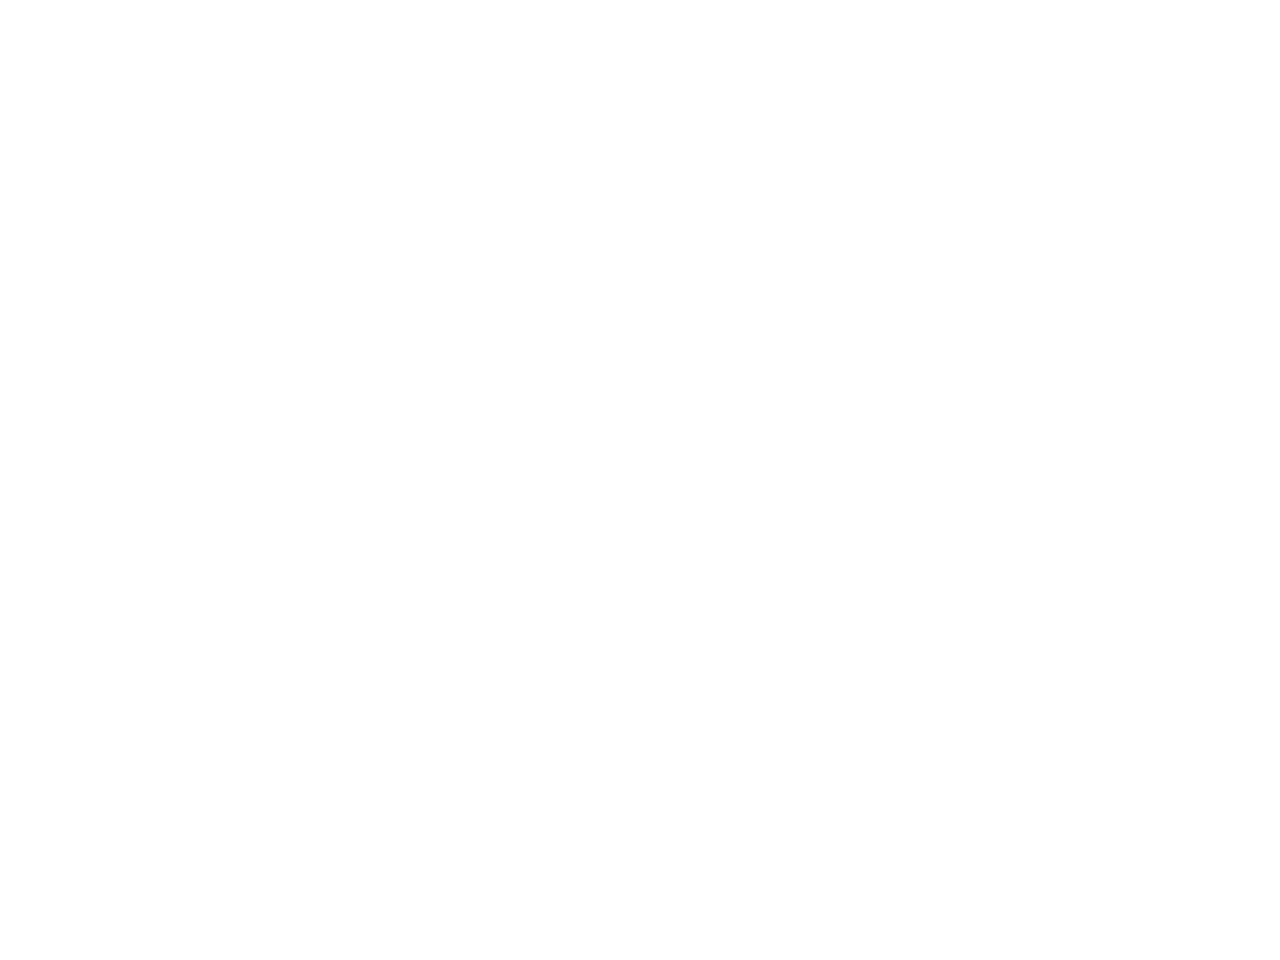

<IPython.core.display.Javascript object>


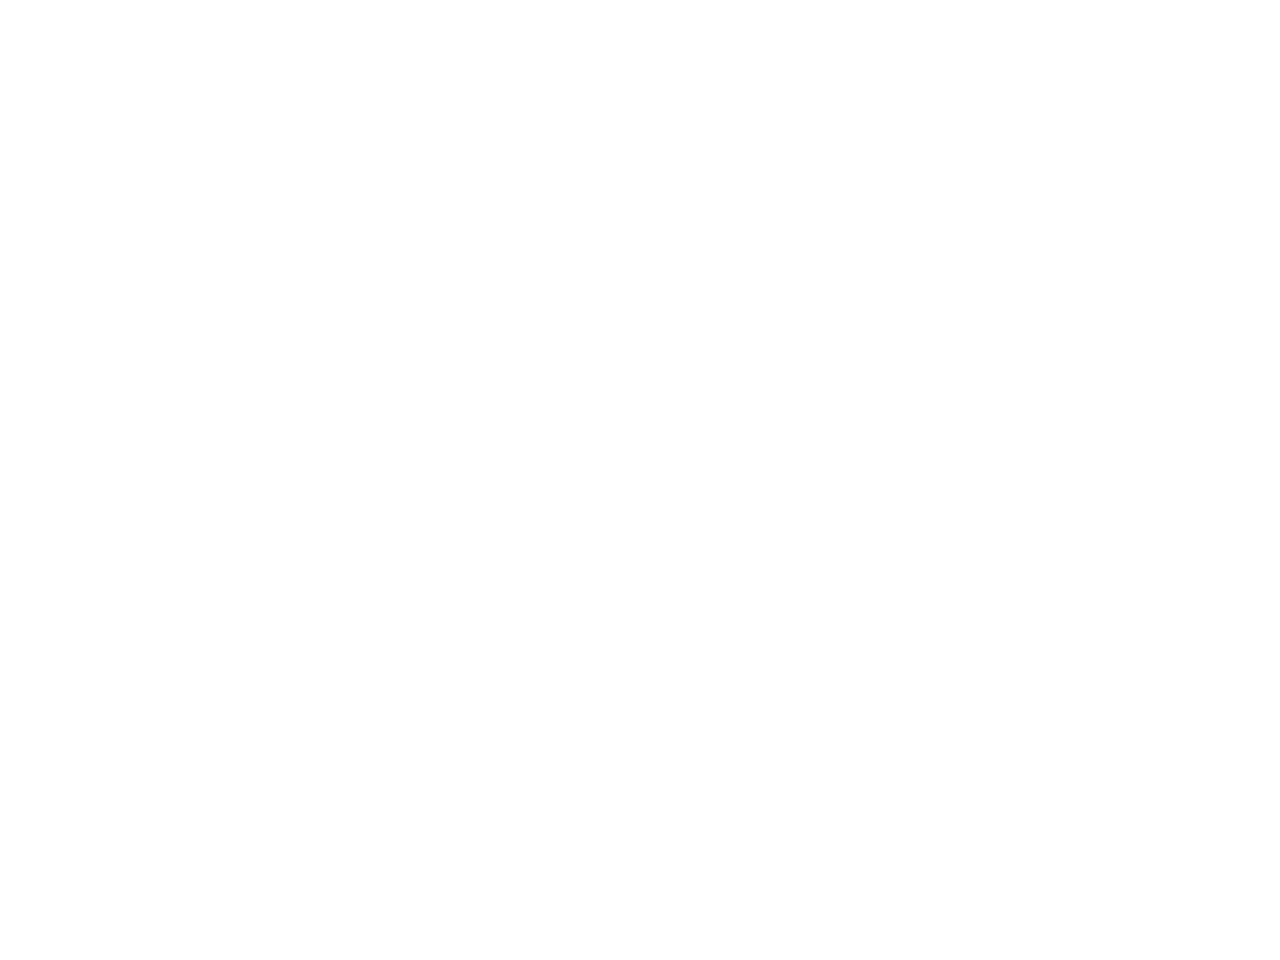

<IPython.core.display.Javascript object>


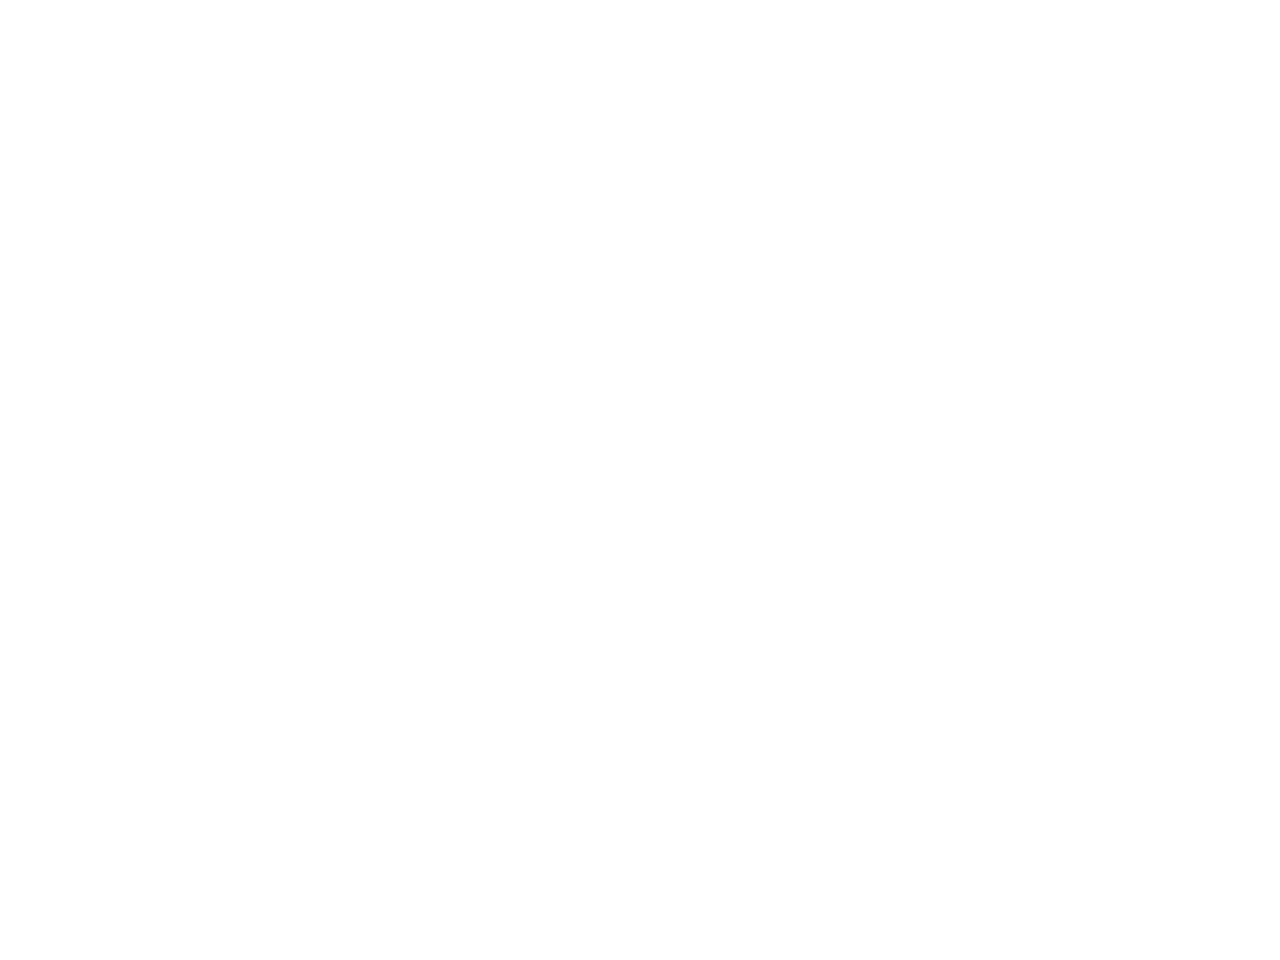

<IPython.core.display.Javascript object>


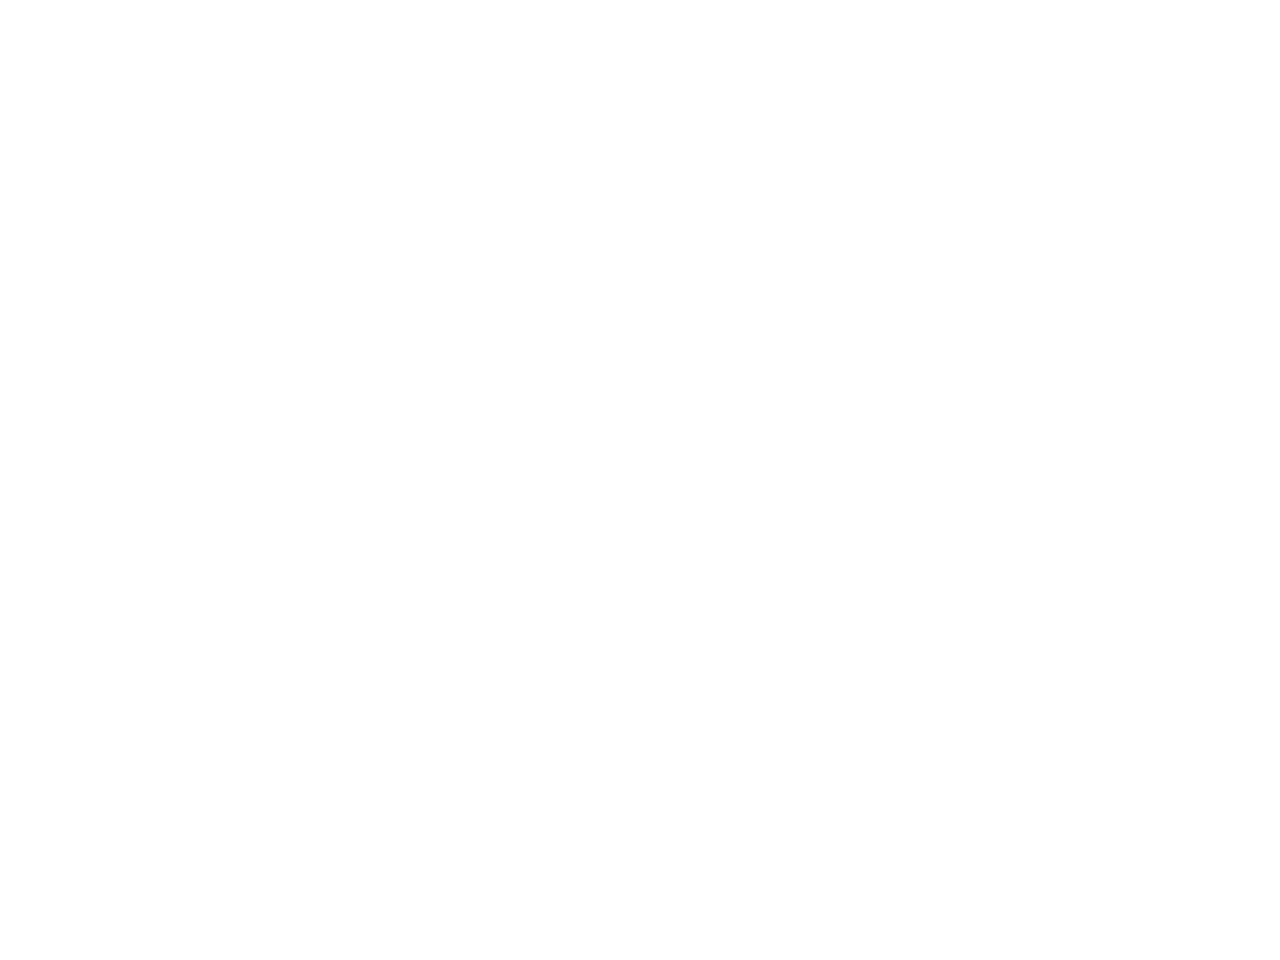

<IPython.core.display.Javascript object>


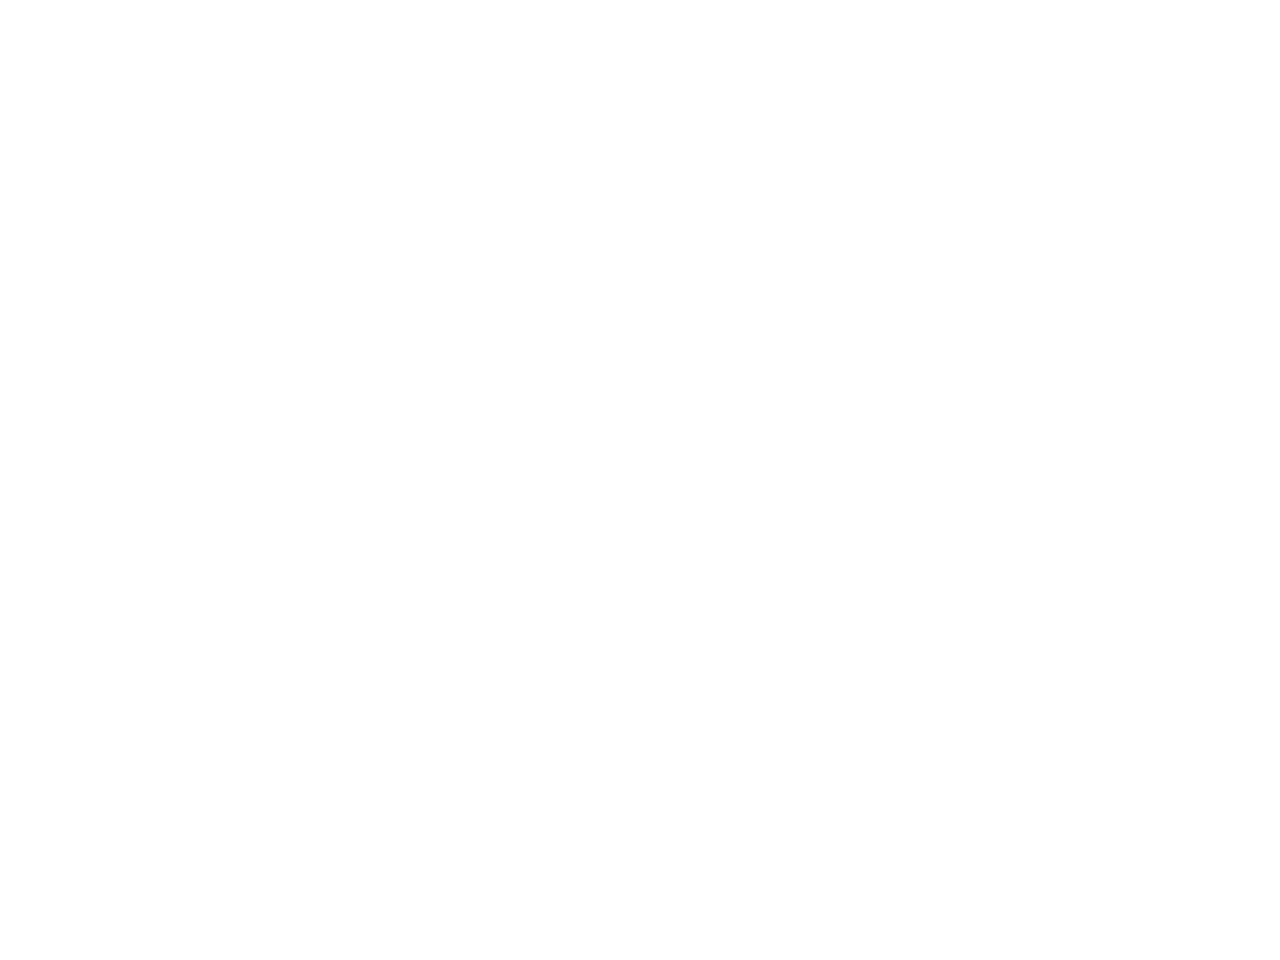

<IPython.core.display.Javascript object>


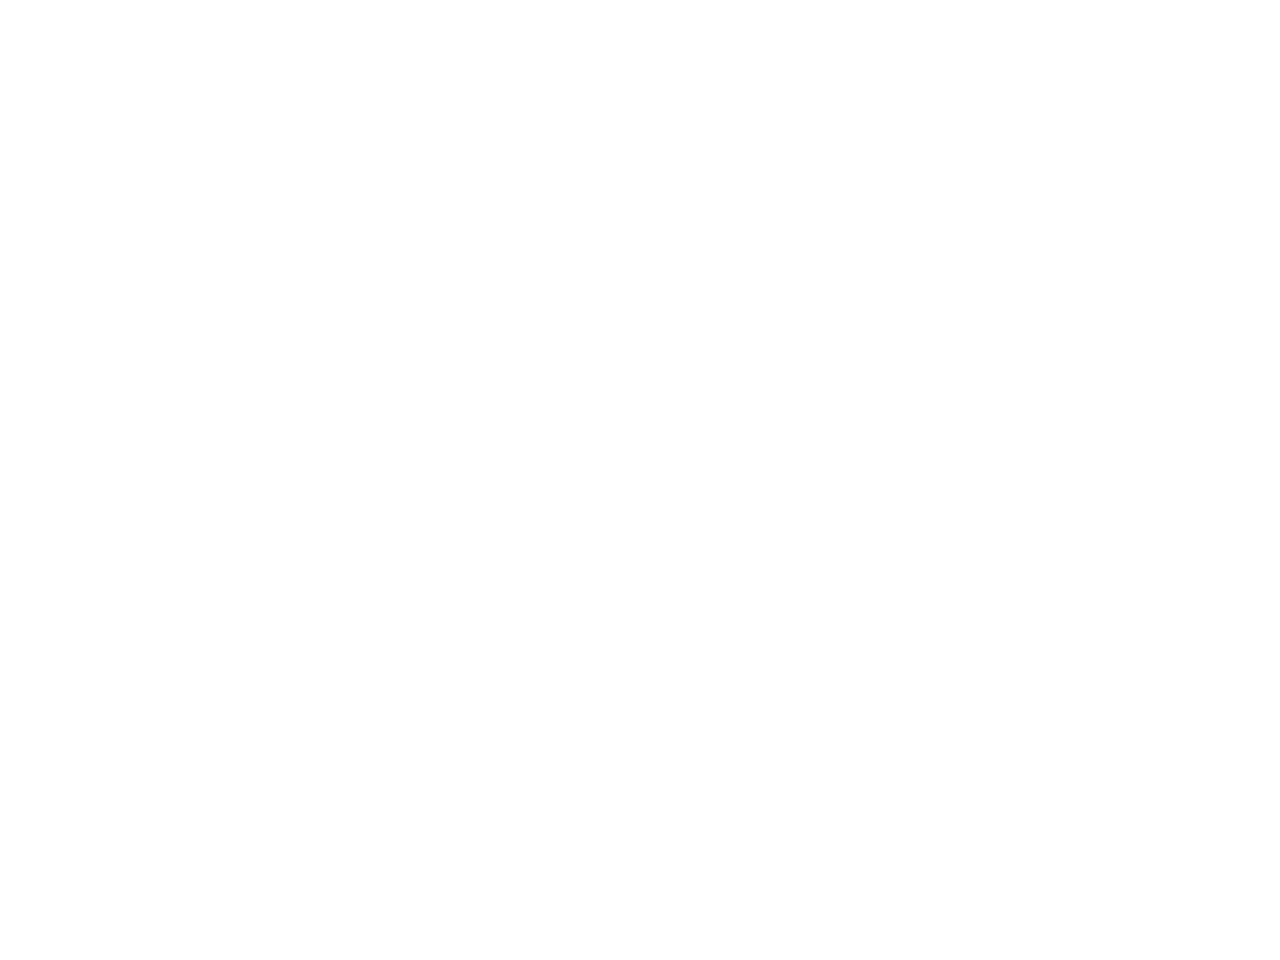

<IPython.core.display.Javascript object>


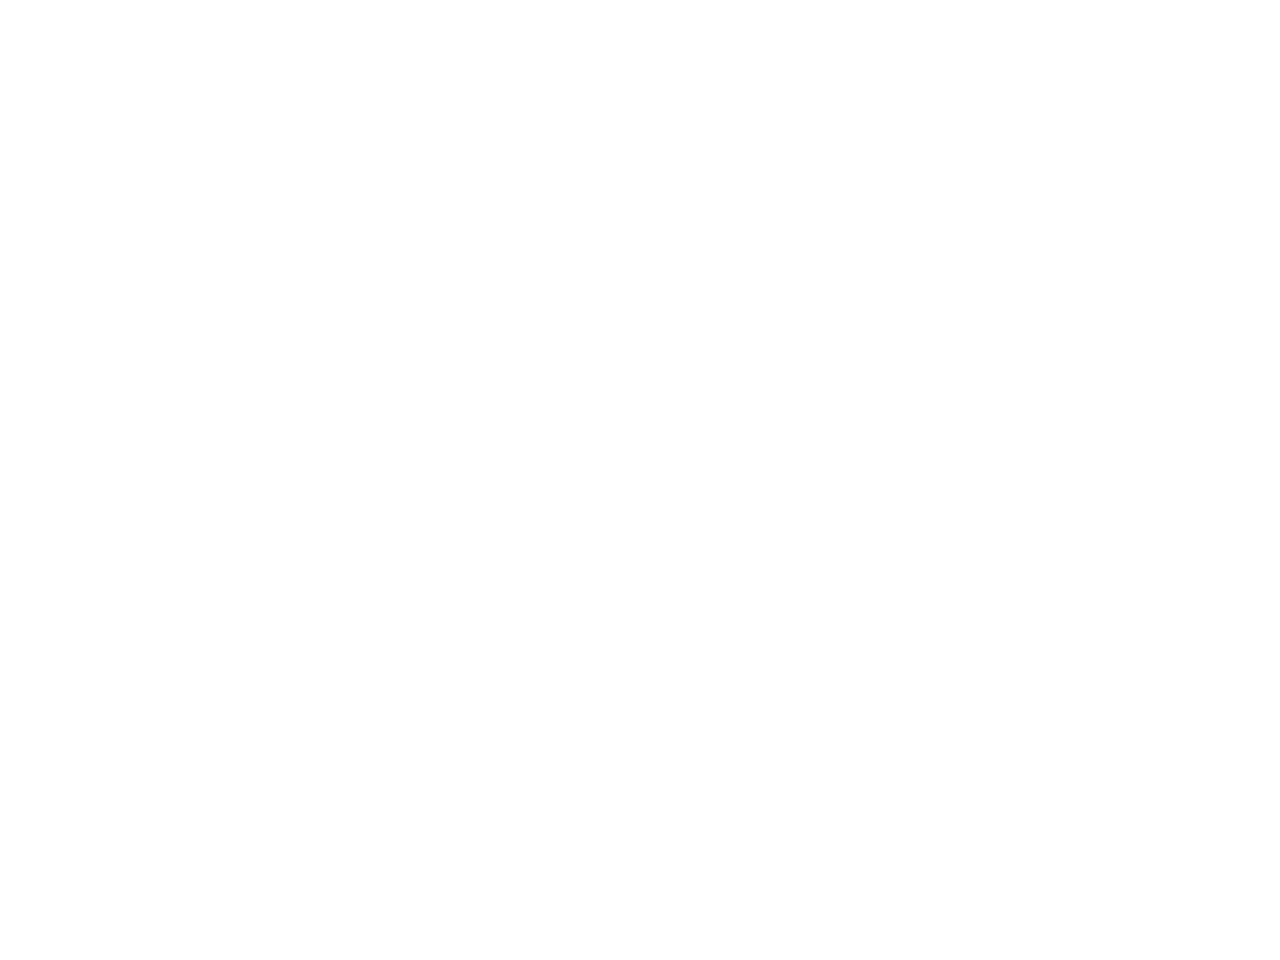

<IPython.core.display.Javascript object>


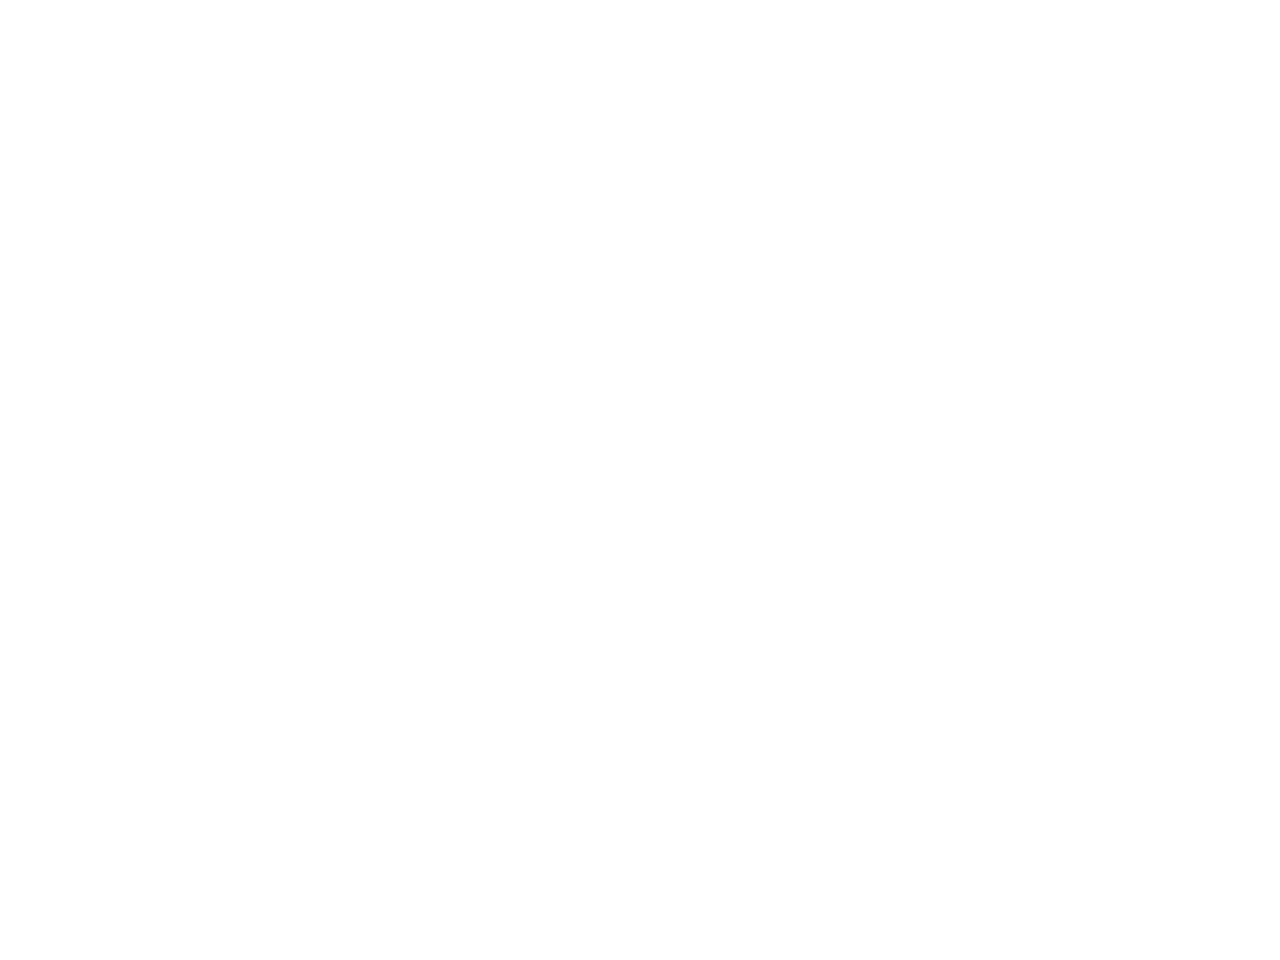

<IPython.core.display.Javascript object>


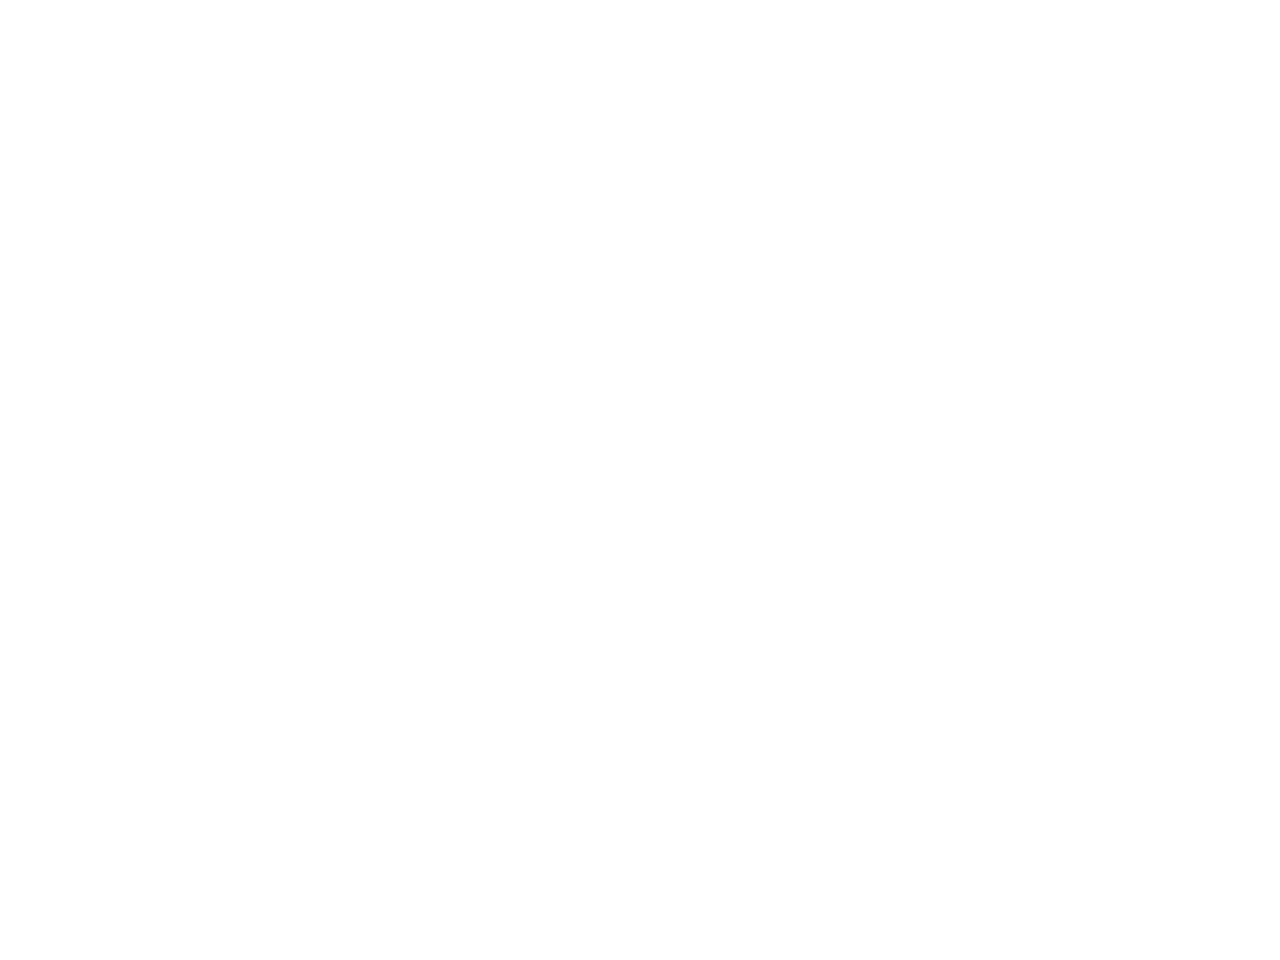

<IPython.core.display.Javascript object>


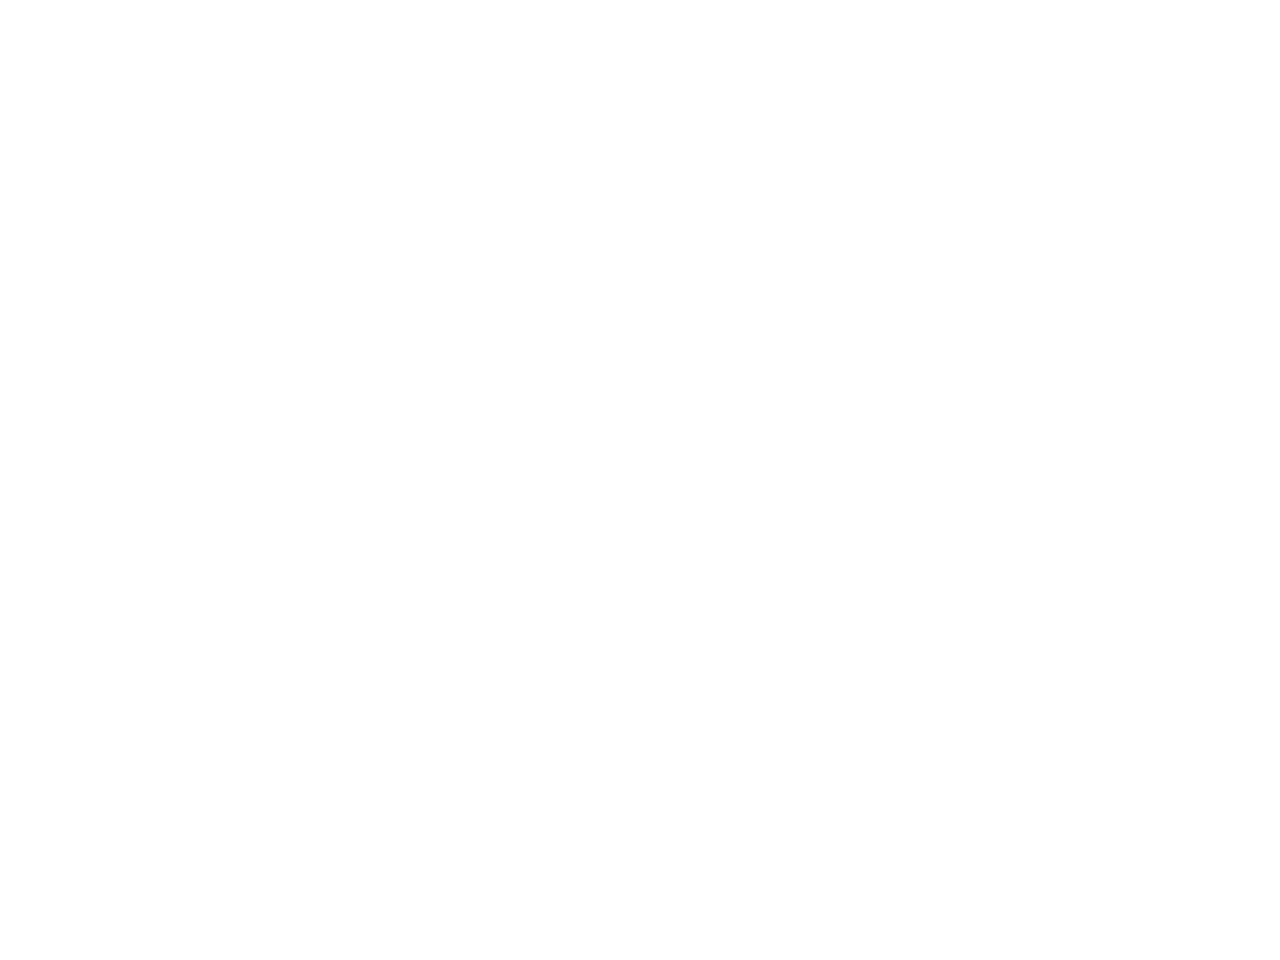

<IPython.core.display.Javascript object>


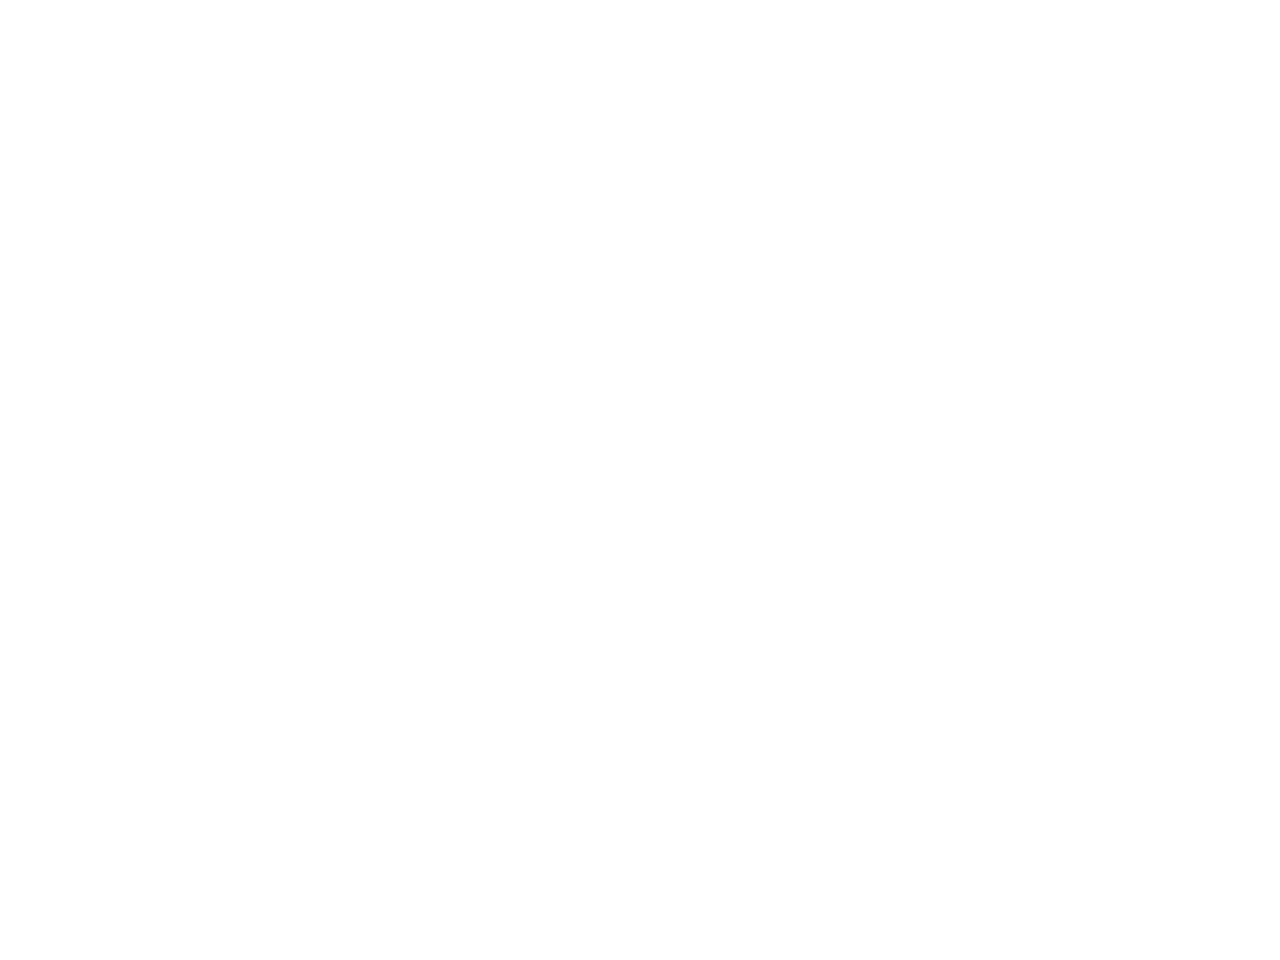

<IPython.core.display.Javascript object>


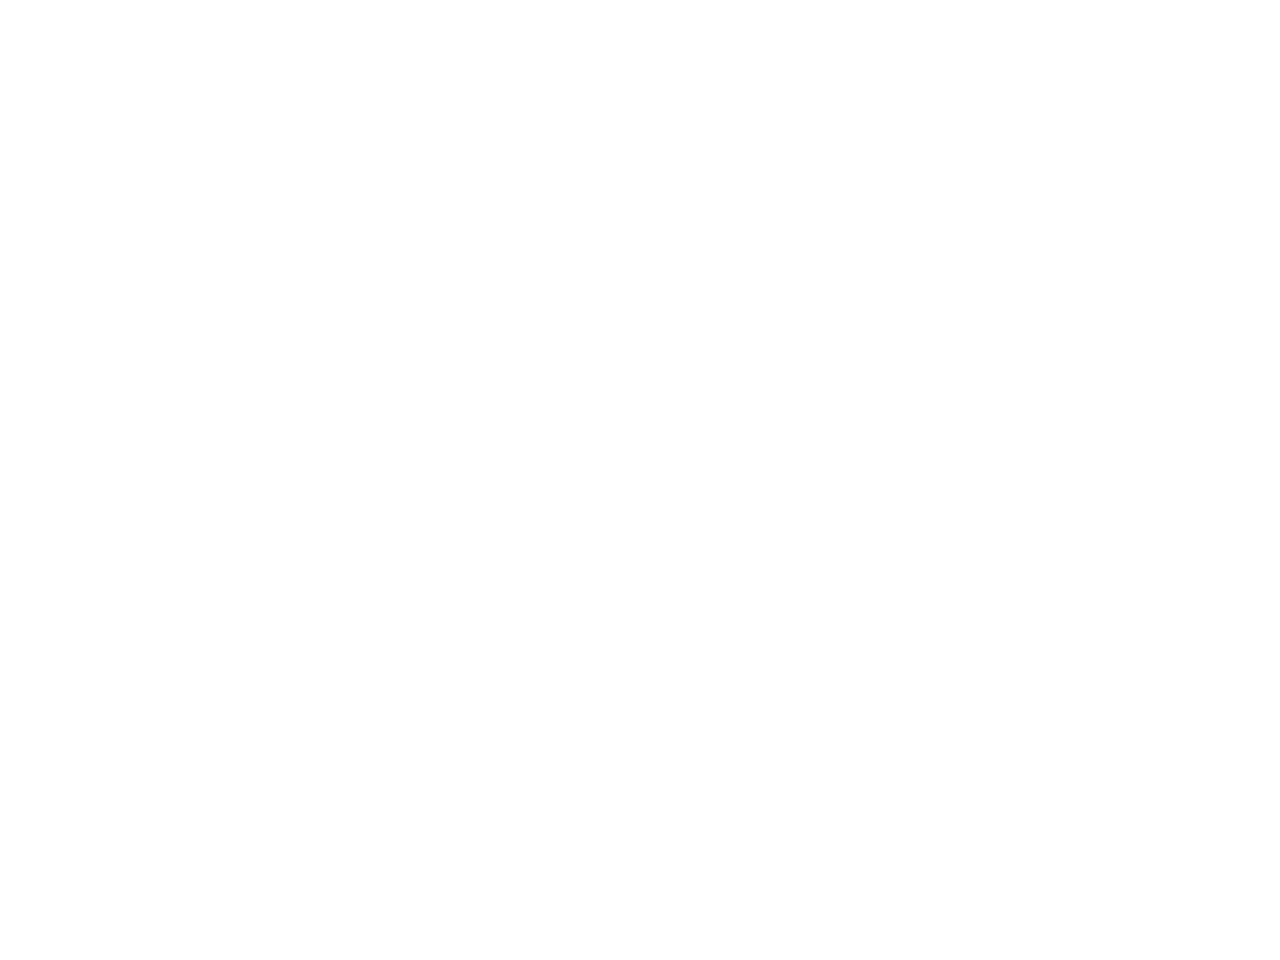

<IPython.core.display.Javascript object>


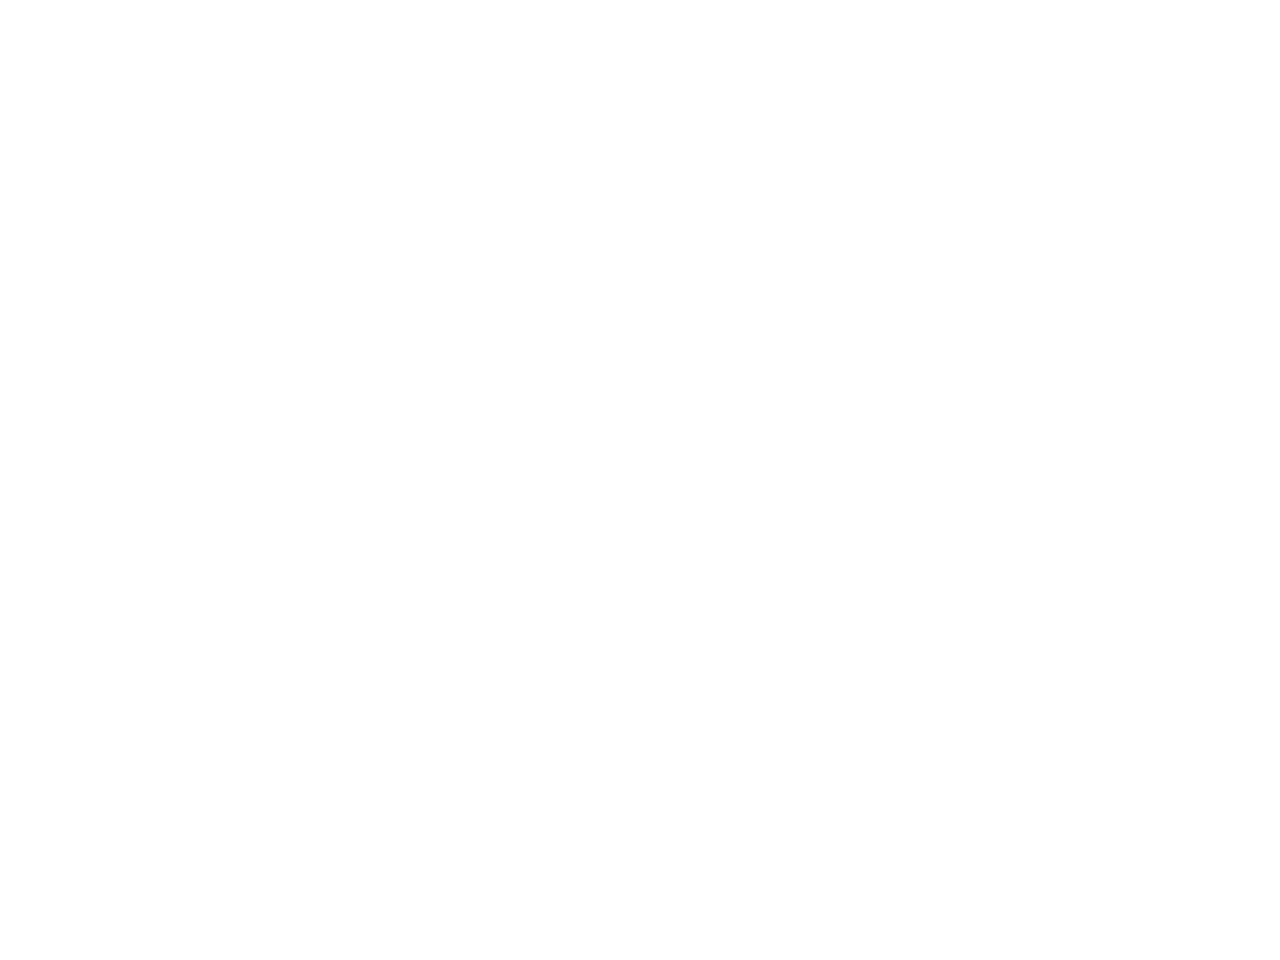

<IPython.core.display.Javascript object>


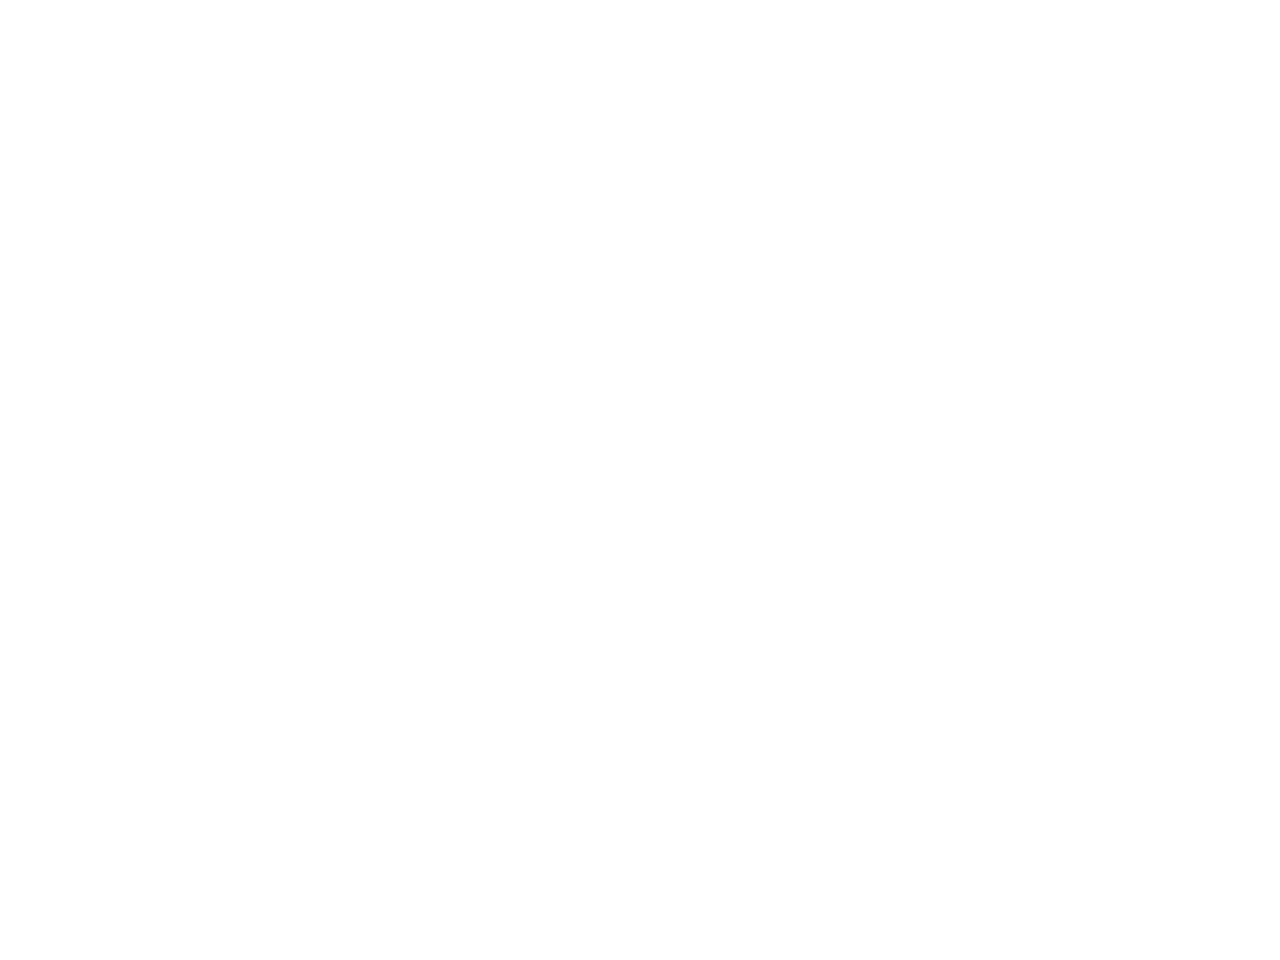

<IPython.core.display.Javascript object>


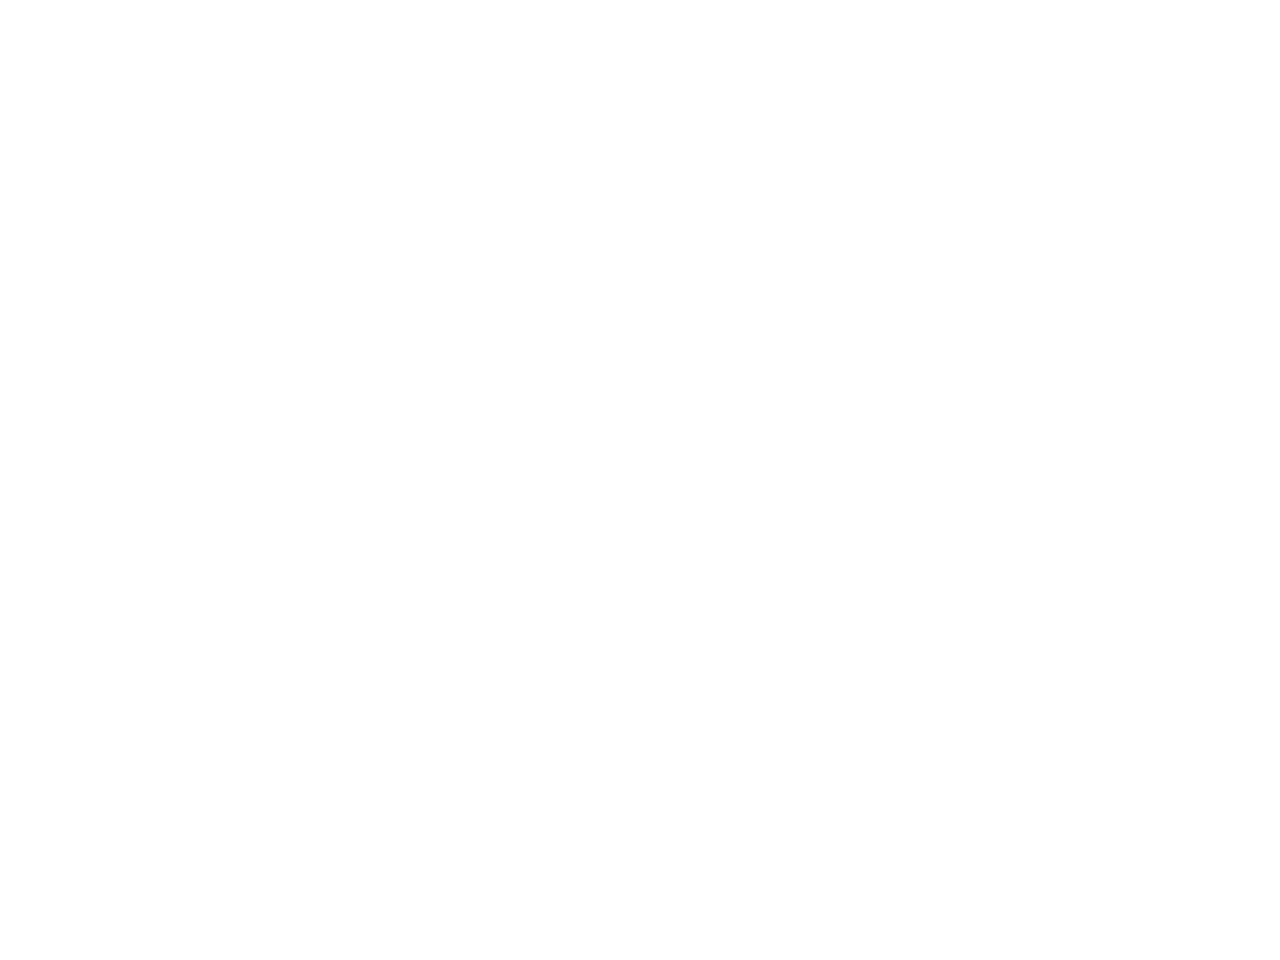

<IPython.core.display.Javascript object>


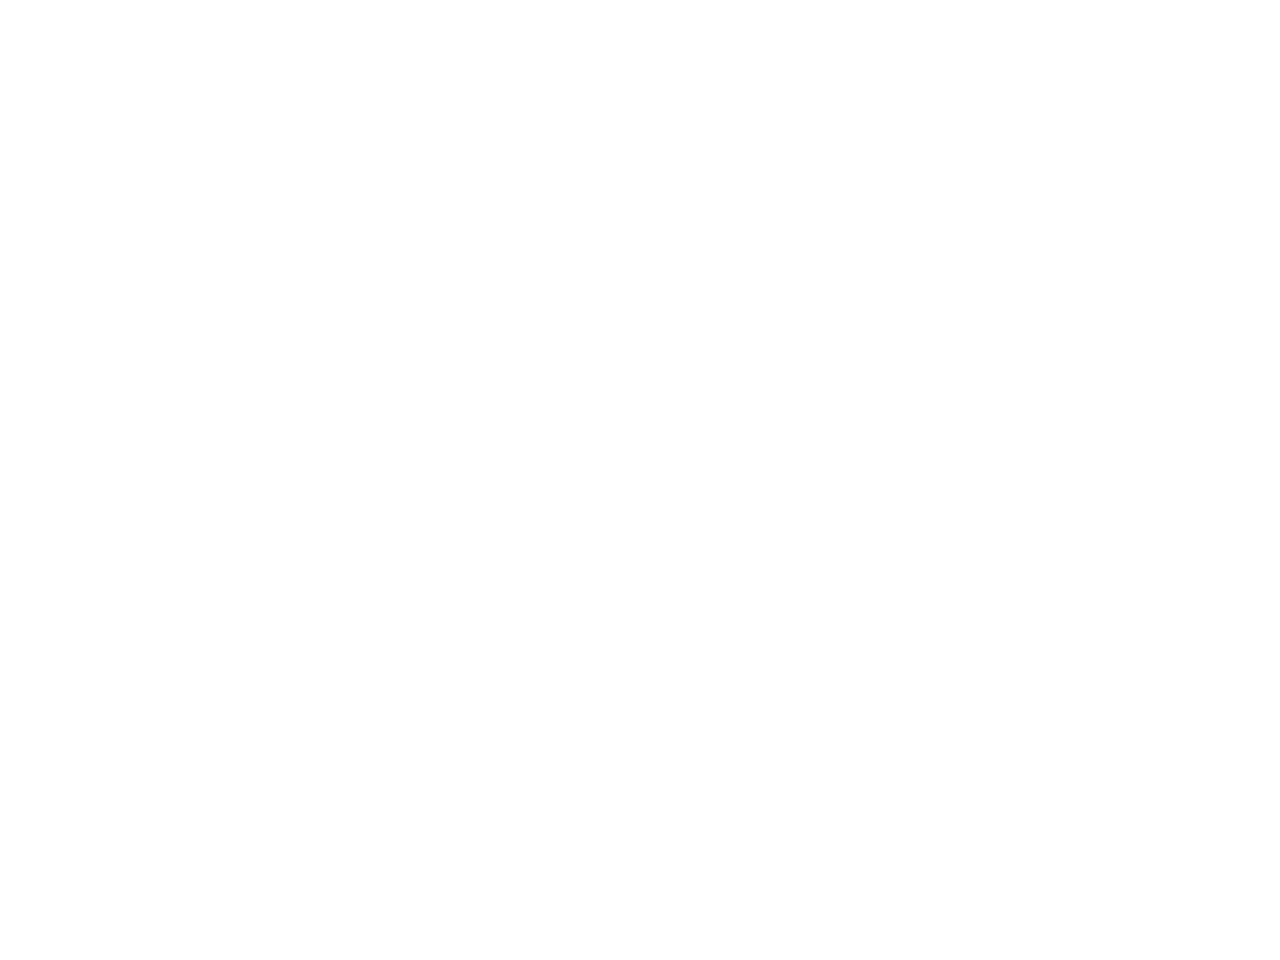

<IPython.core.display.Javascript object>


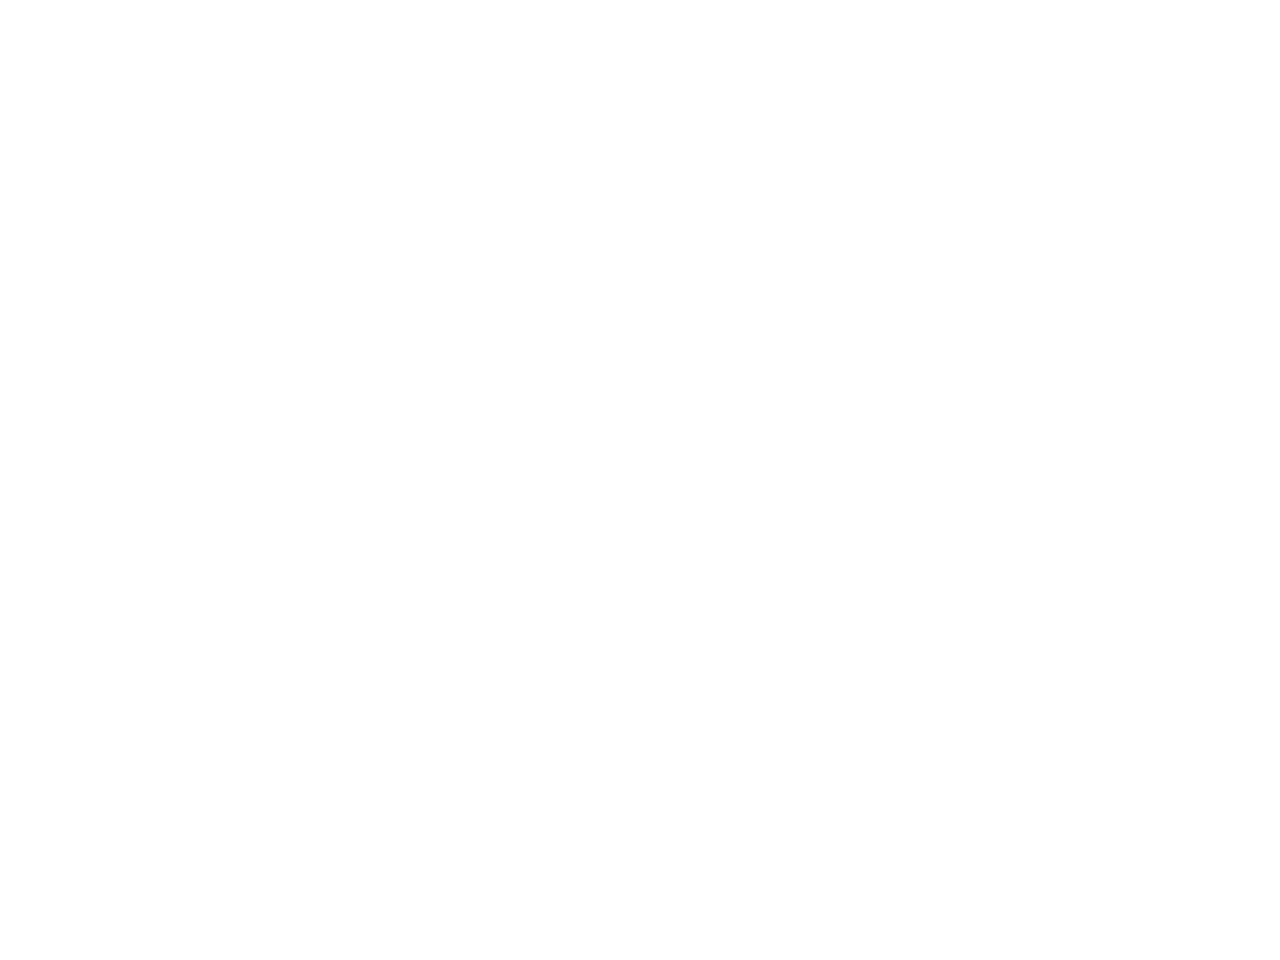

<IPython.core.display.Javascript object>


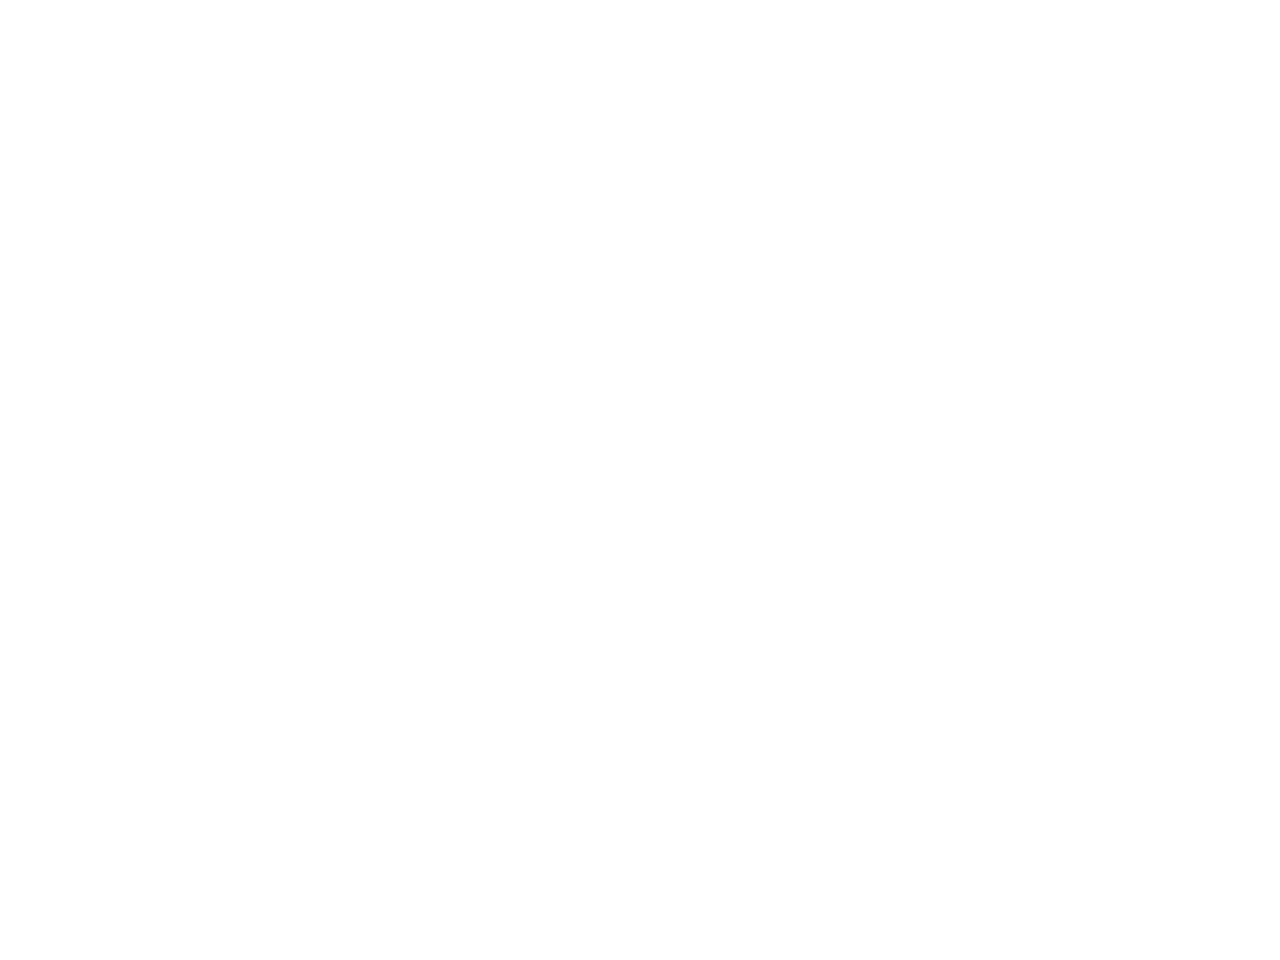

<IPython.core.display.Javascript object>


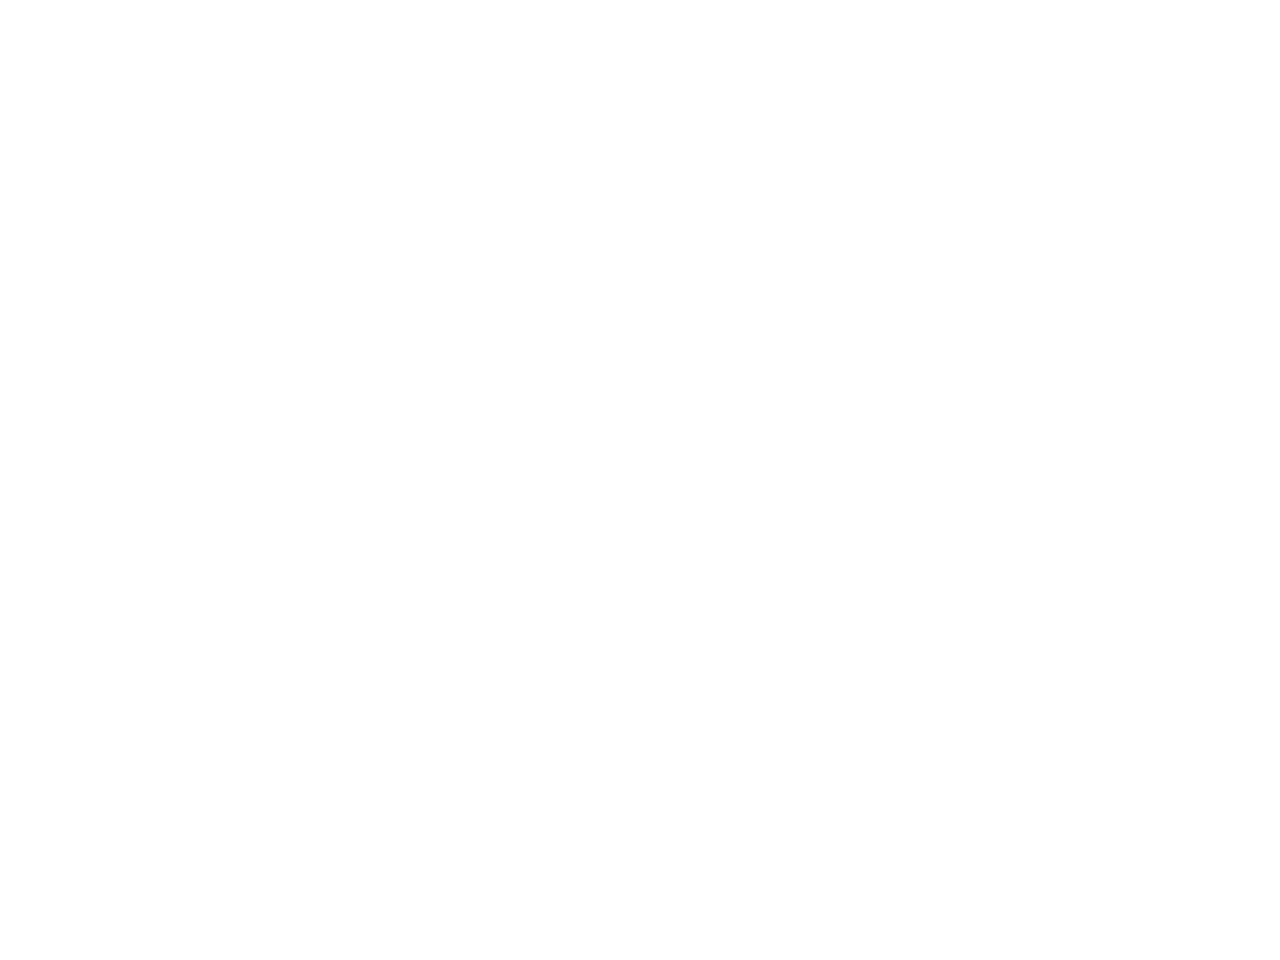

<IPython.core.display.Javascript object>


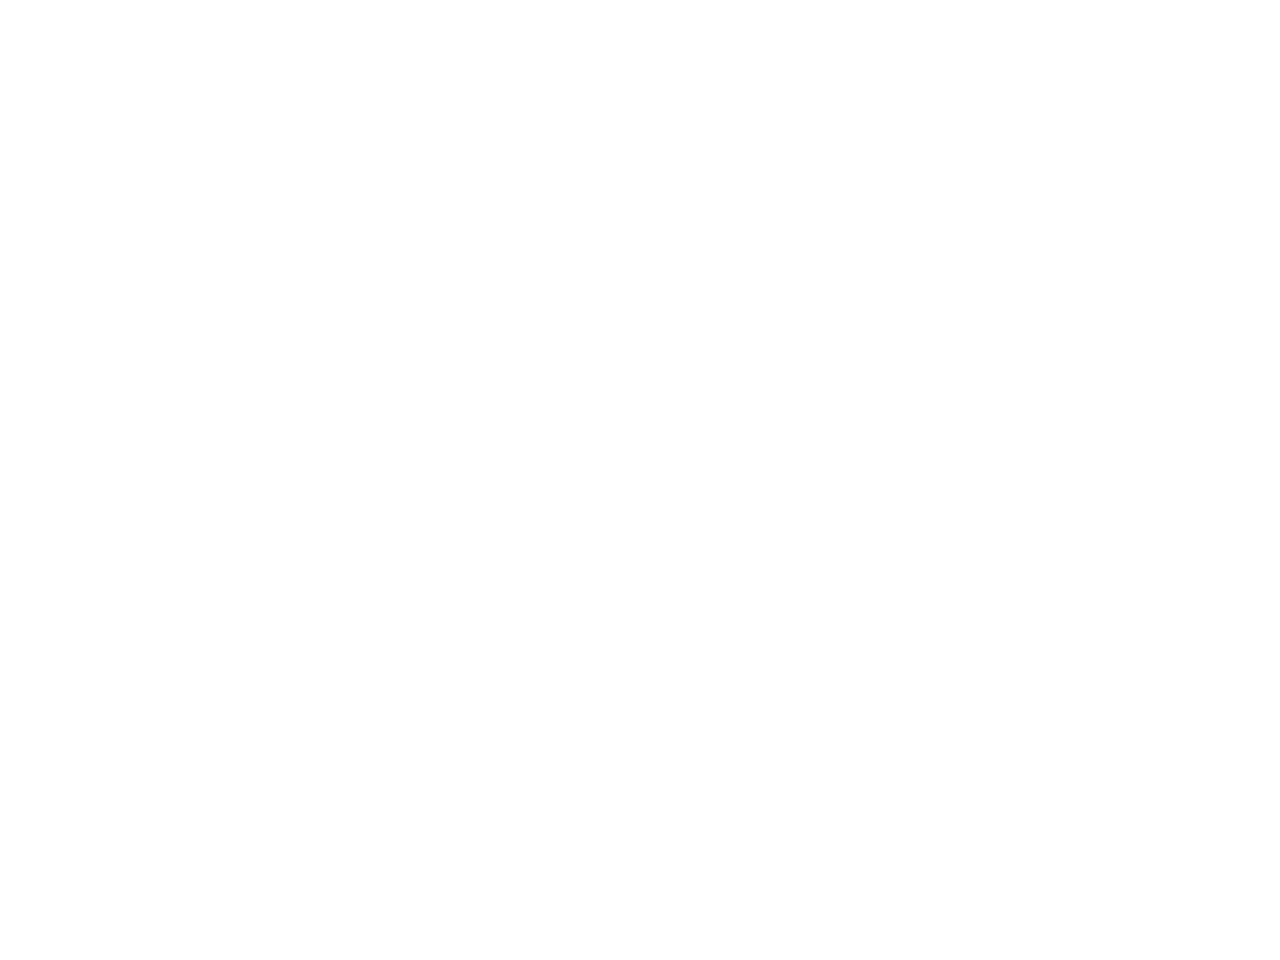

<IPython.core.display.Javascript object>


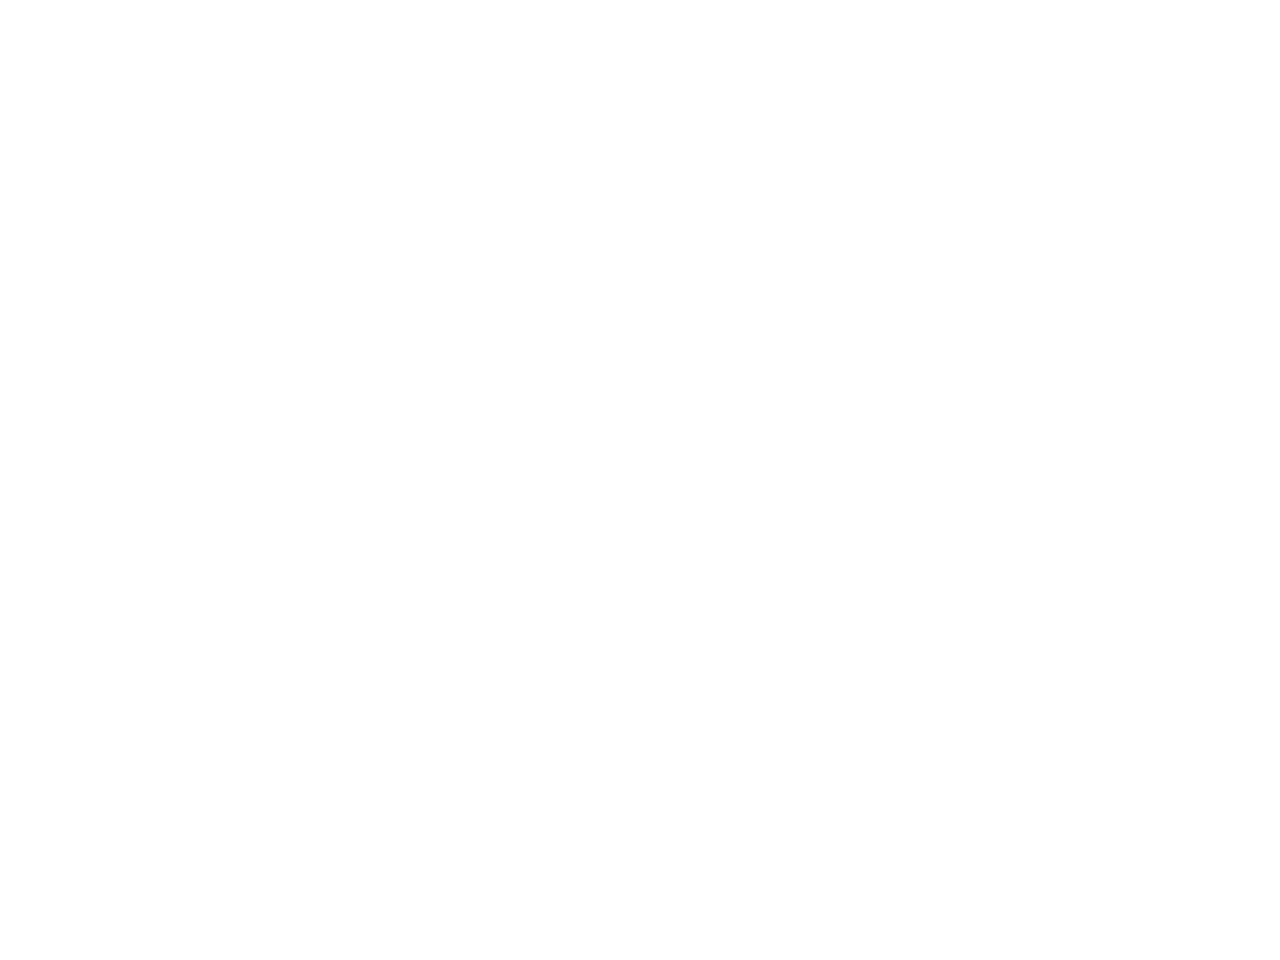

<IPython.core.display.Javascript object>


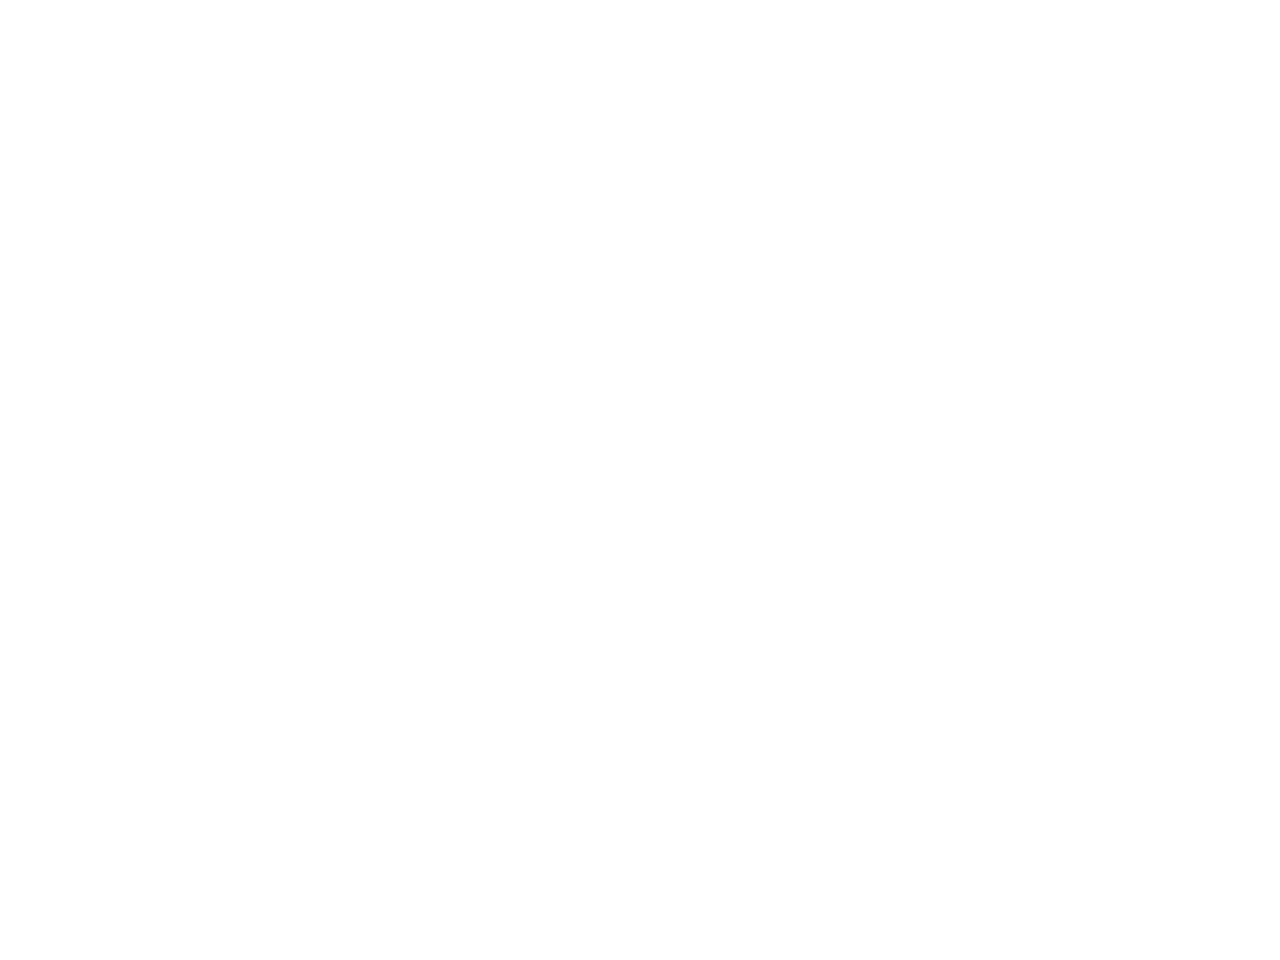

<IPython.core.display.Javascript object>


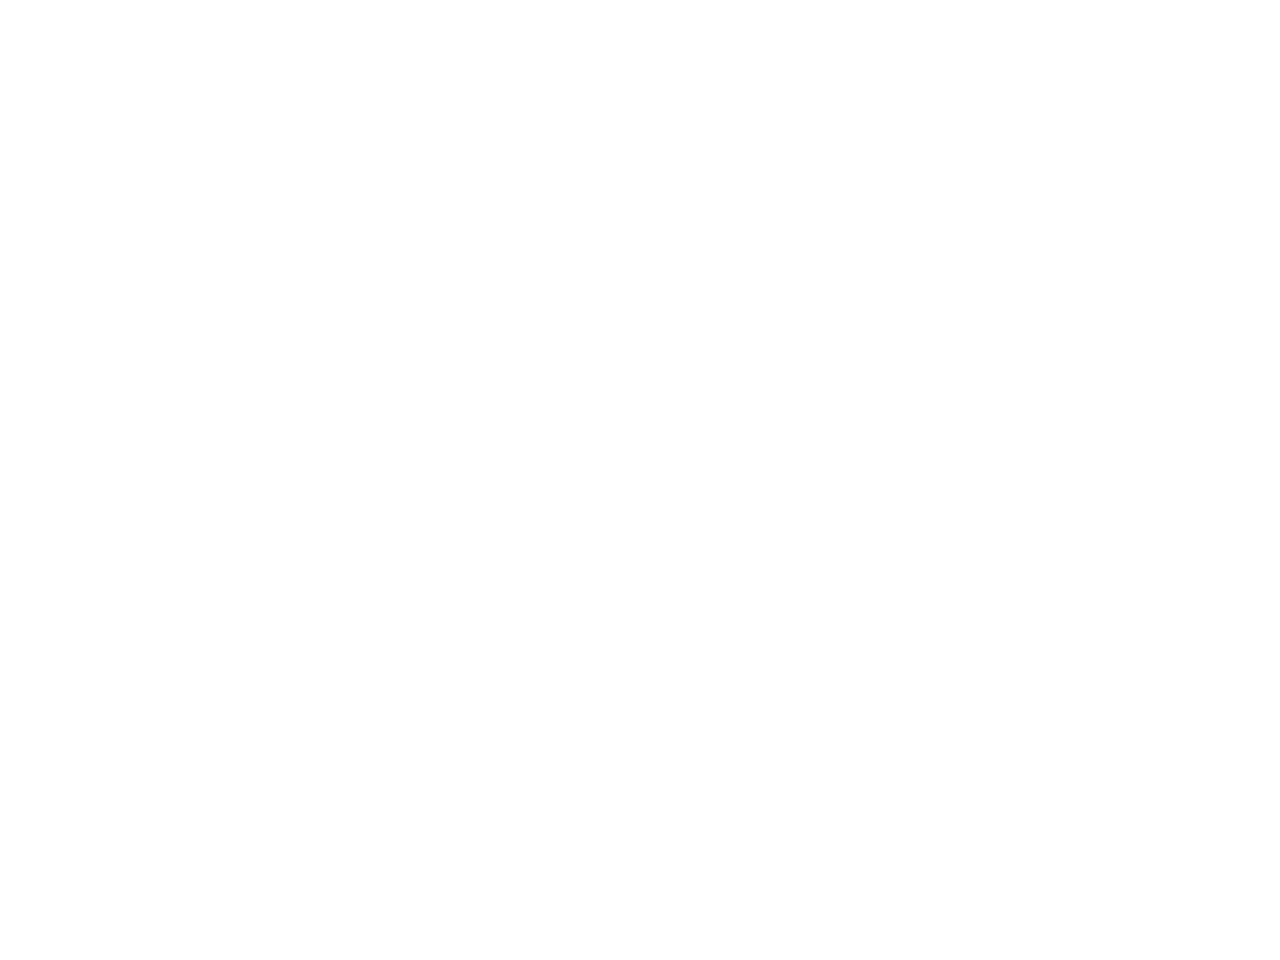

<IPython.core.display.Javascript object>


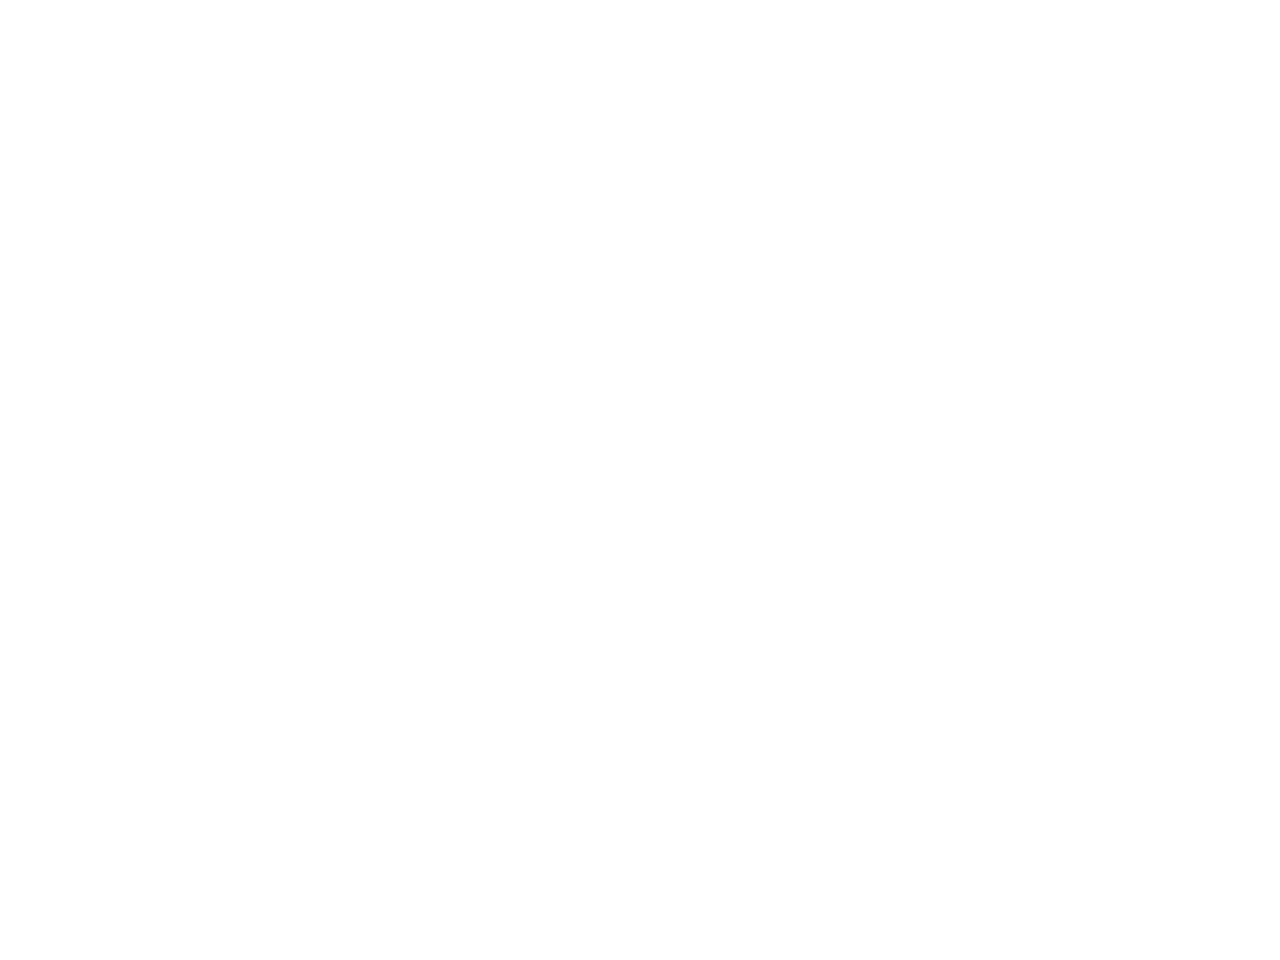

<IPython.core.display.Javascript object>


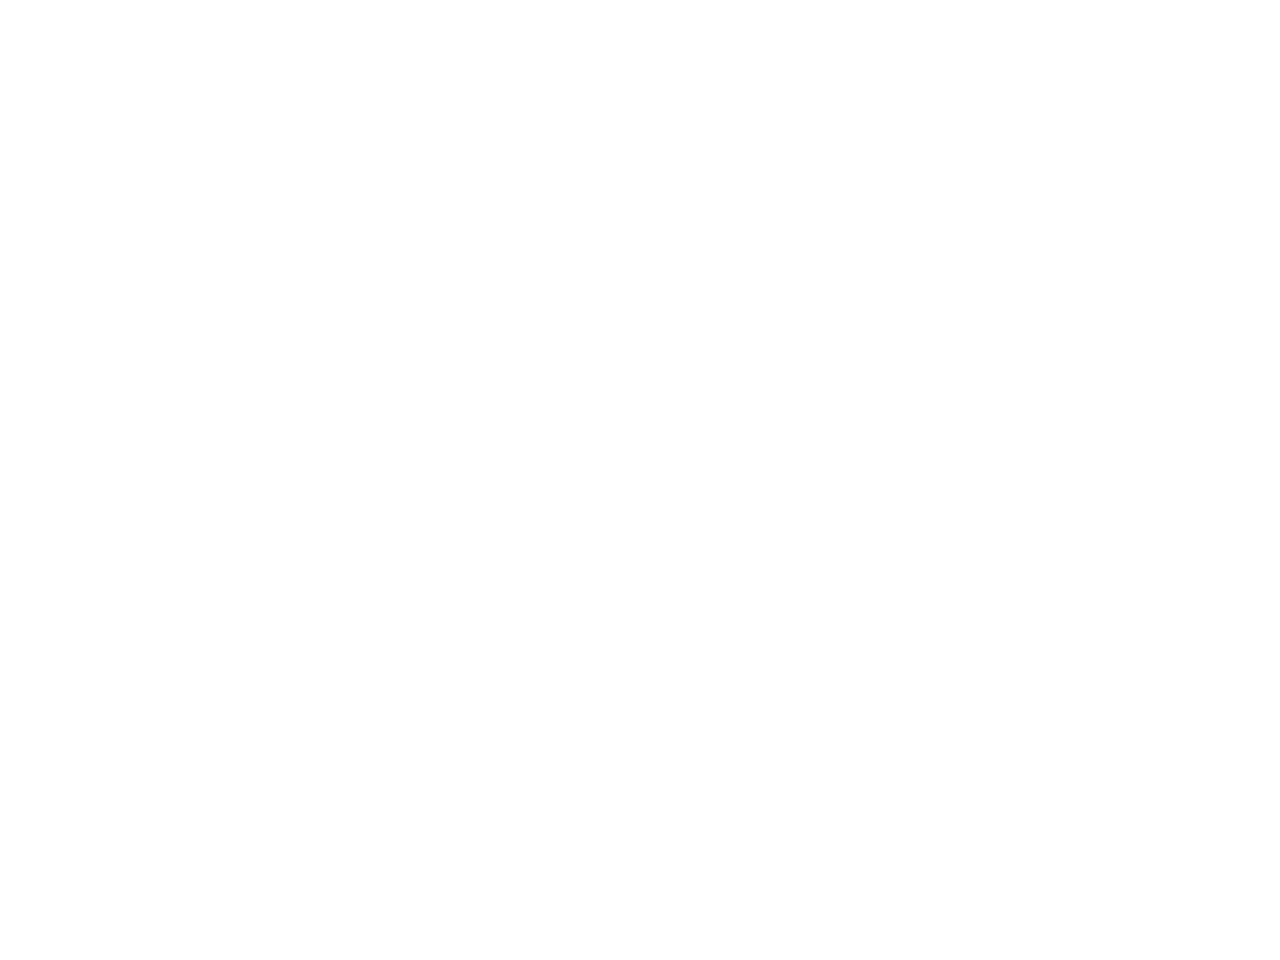

<IPython.core.display.Javascript object>


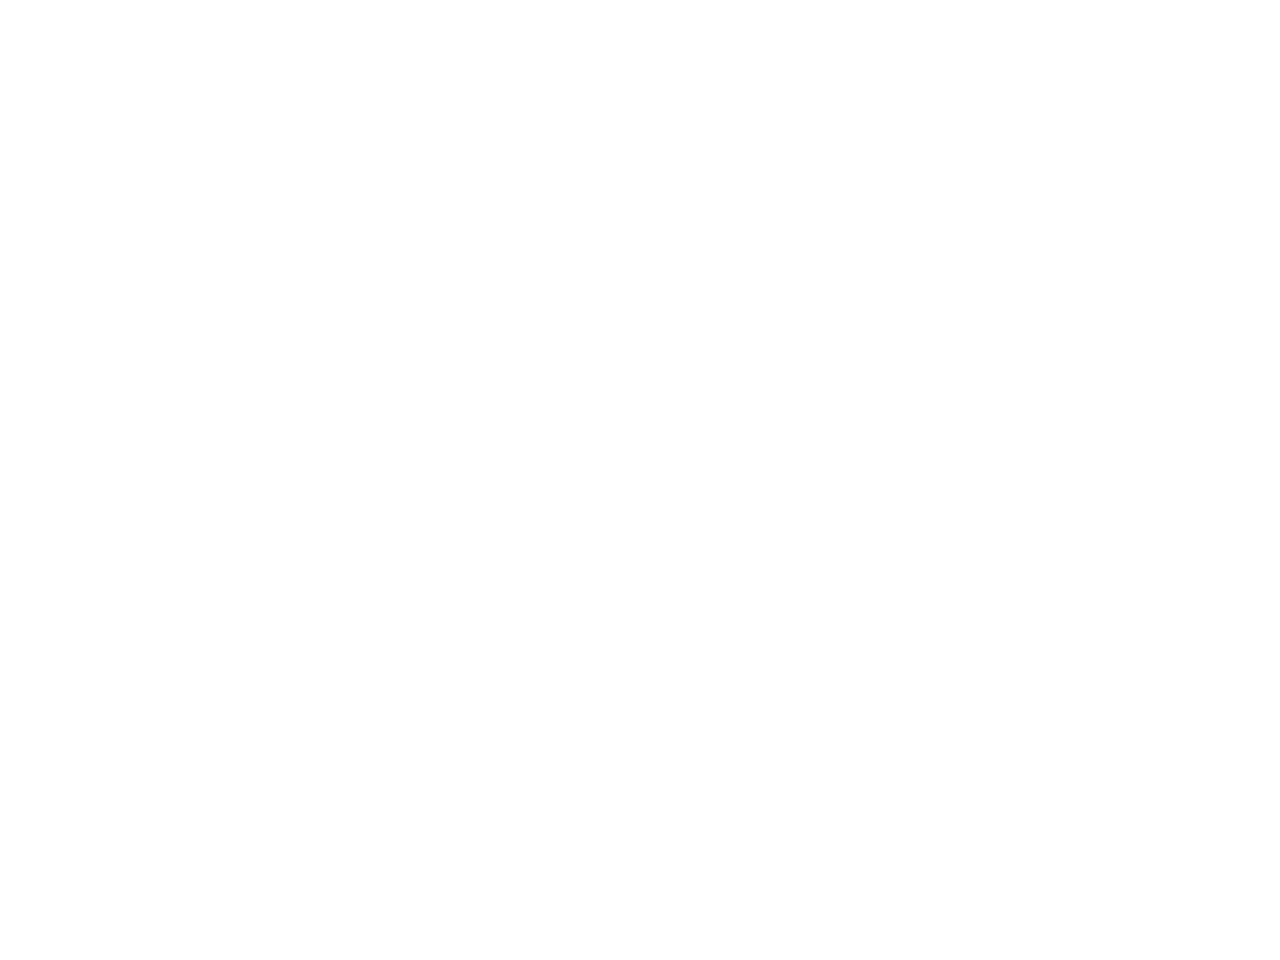

<IPython.core.display.Javascript object>


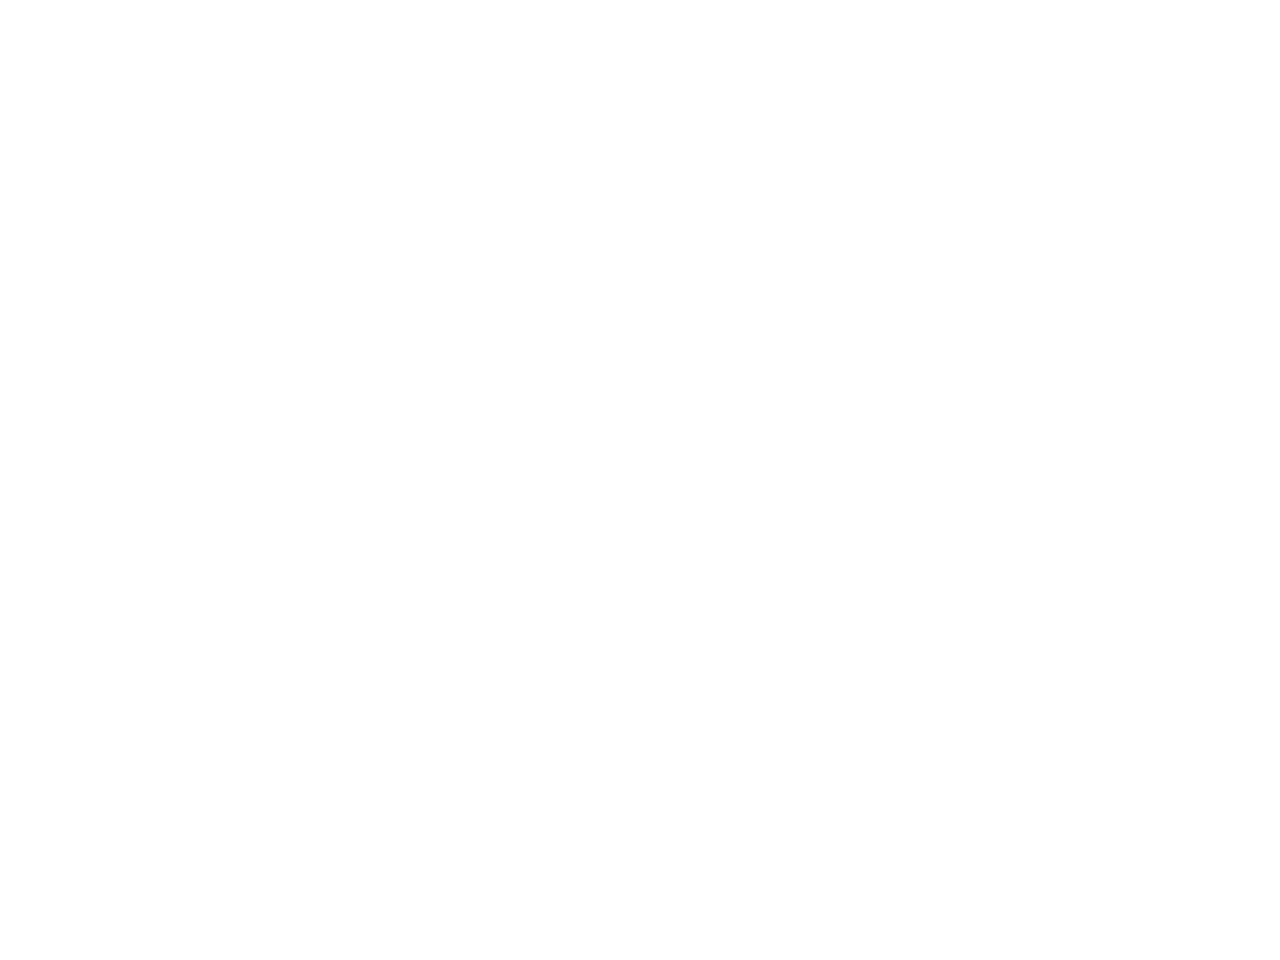

<IPython.core.display.Javascript object>


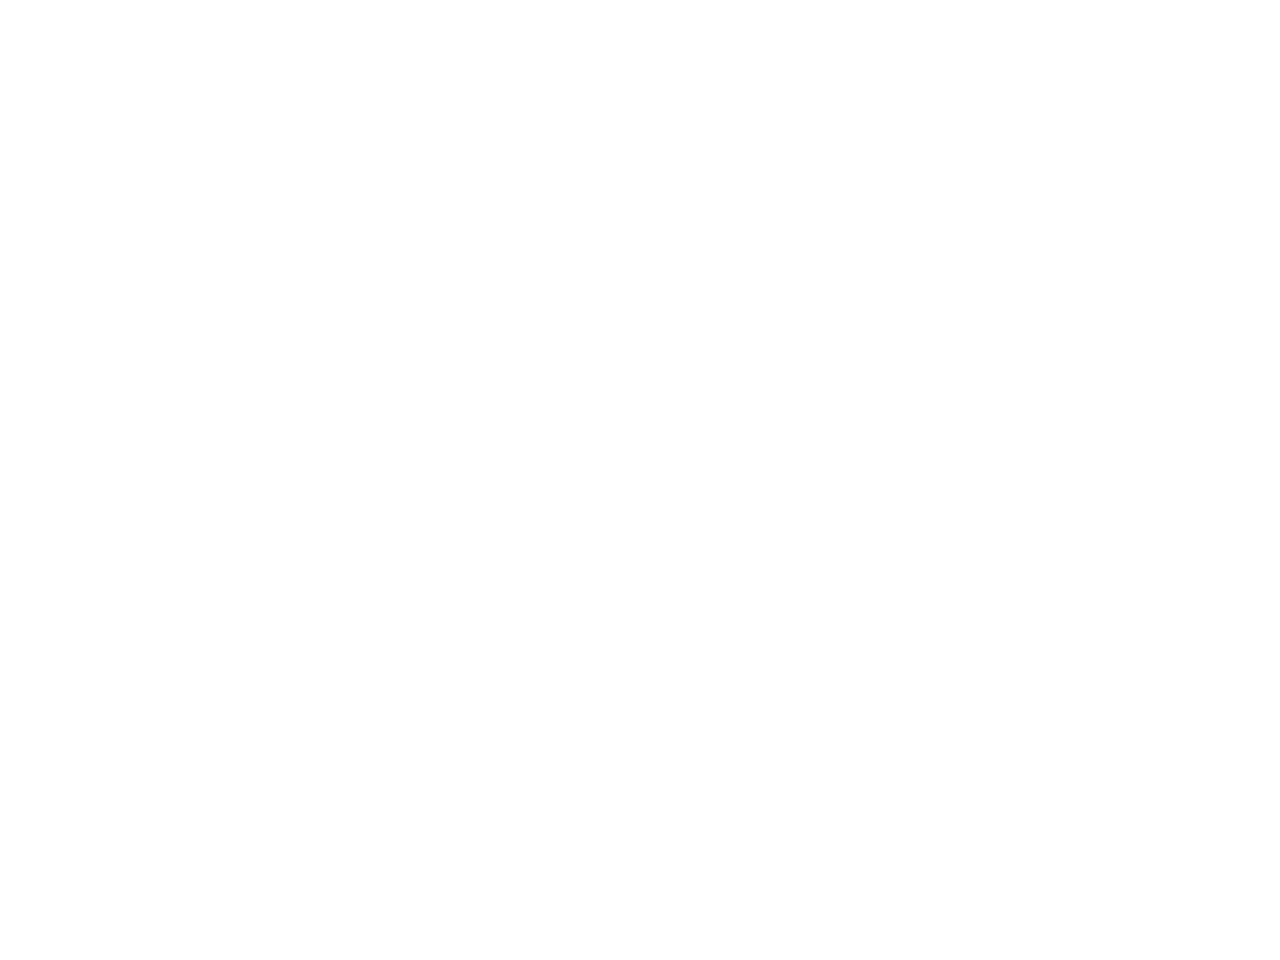

<IPython.core.display.Javascript object>


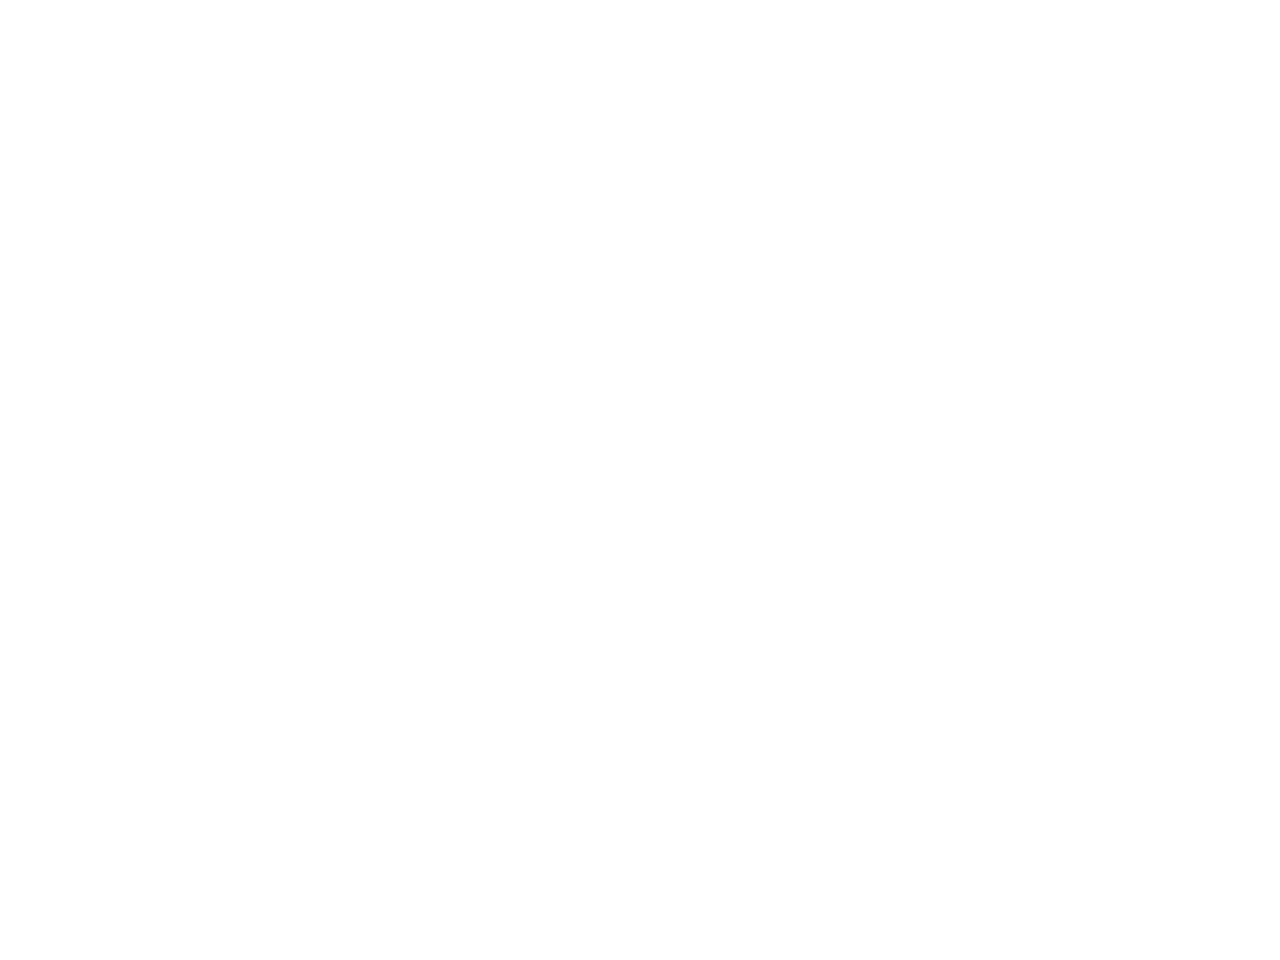

<IPython.core.display.Javascript object>


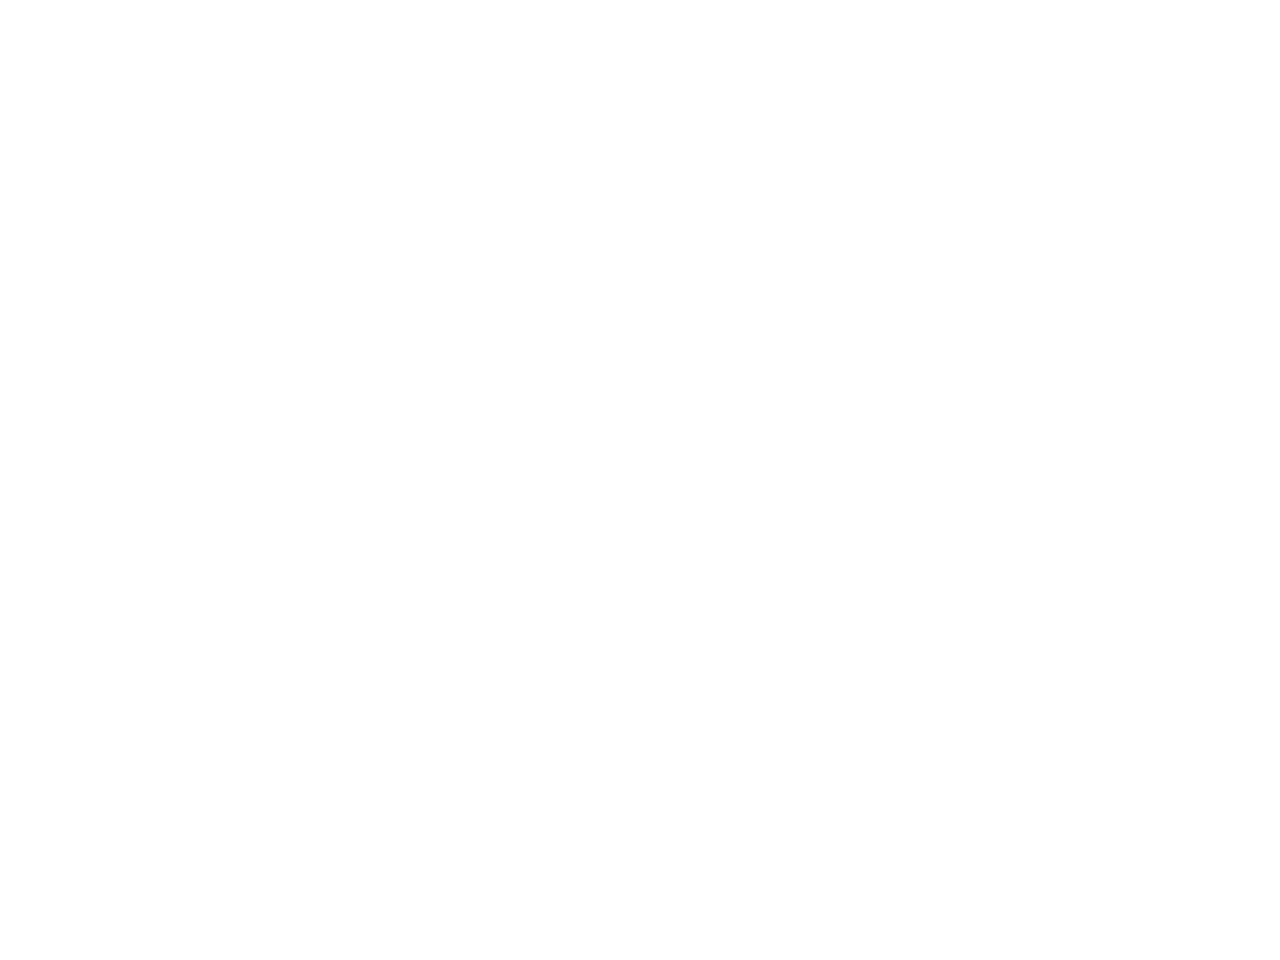

<IPython.core.display.Javascript object>


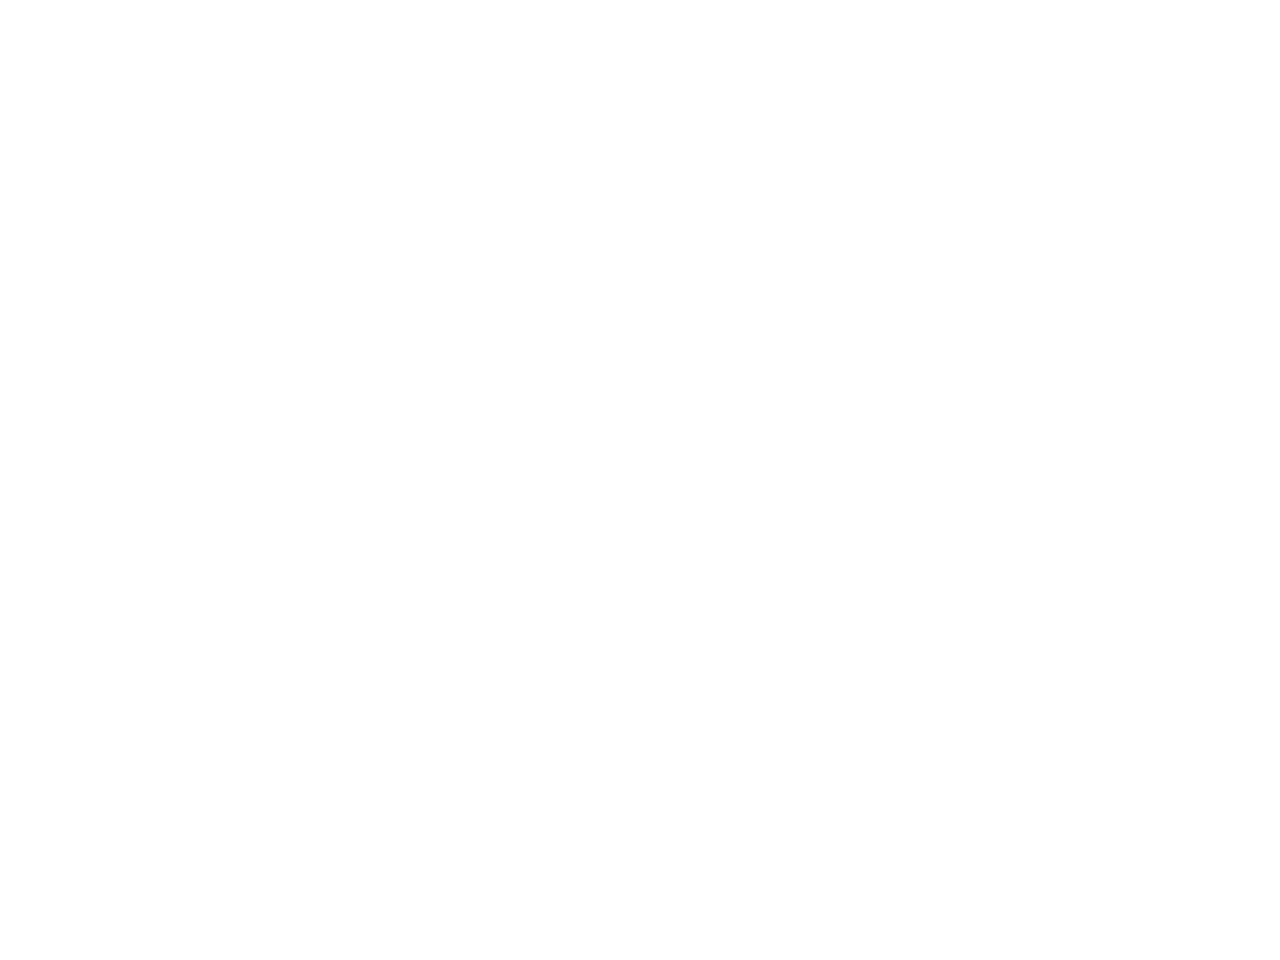

<IPython.core.display.Javascript object>


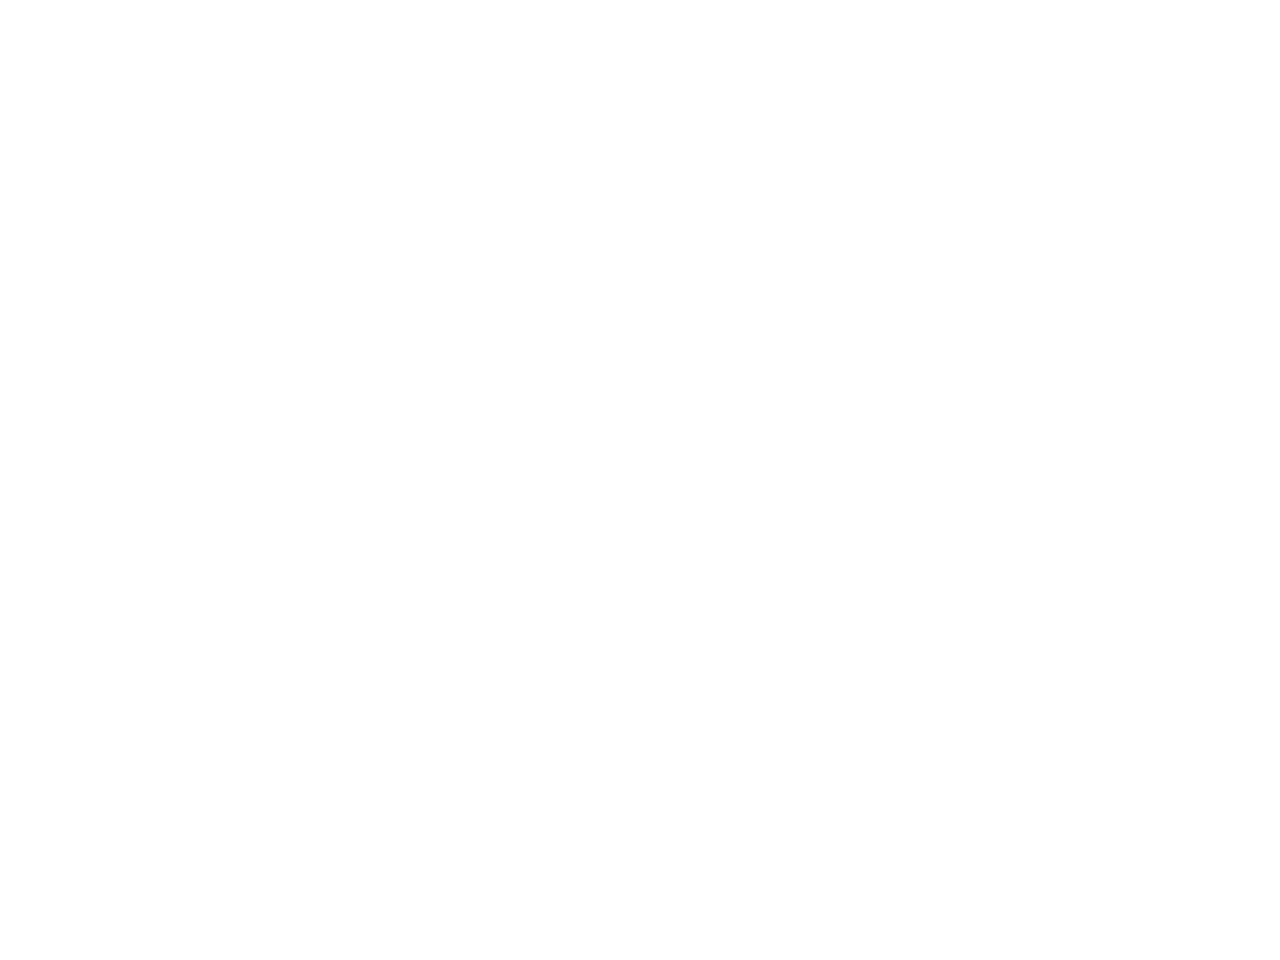

<IPython.core.display.Javascript object>


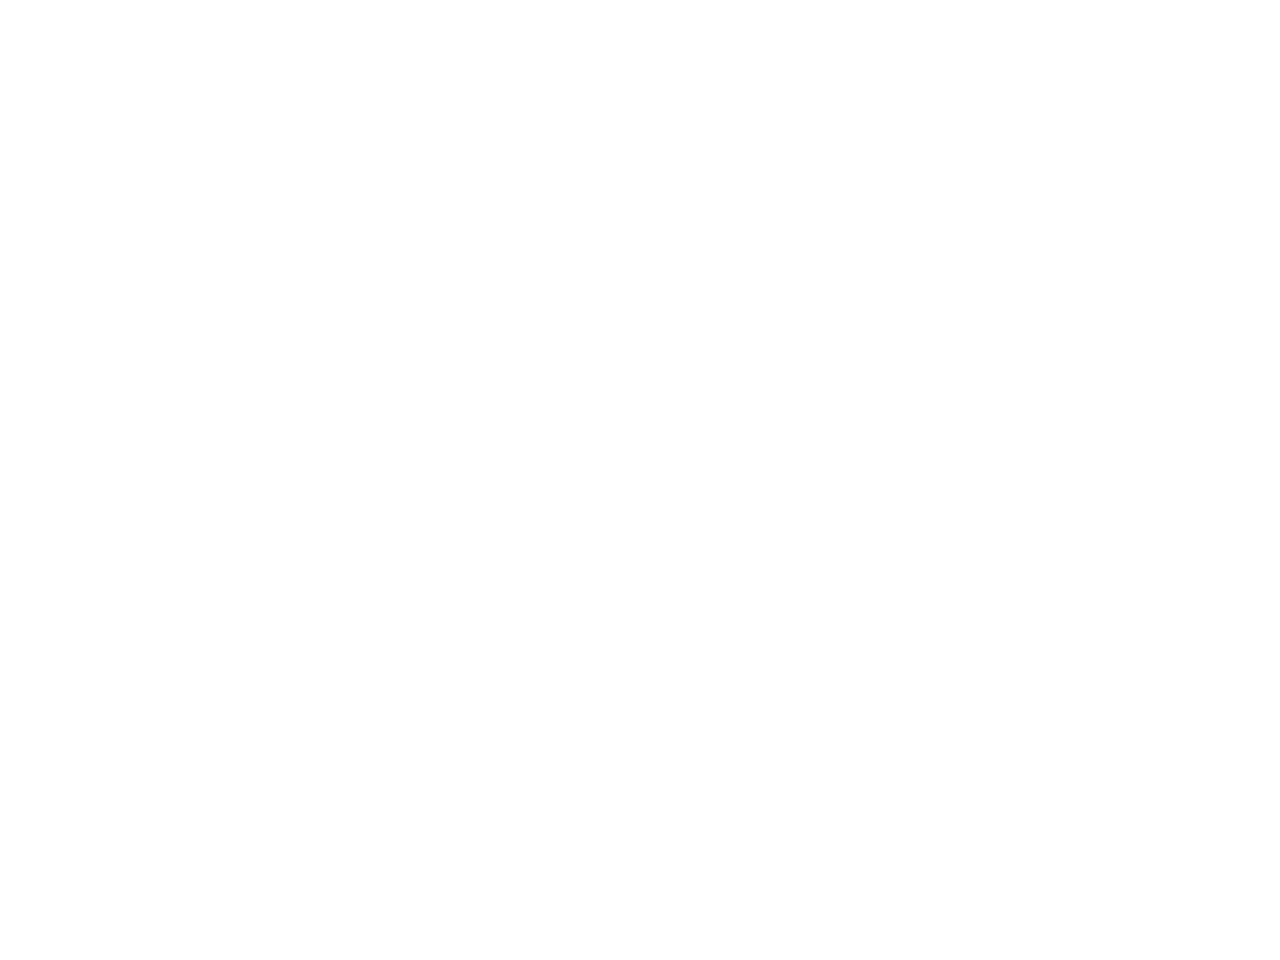

<IPython.core.display.Javascript object>


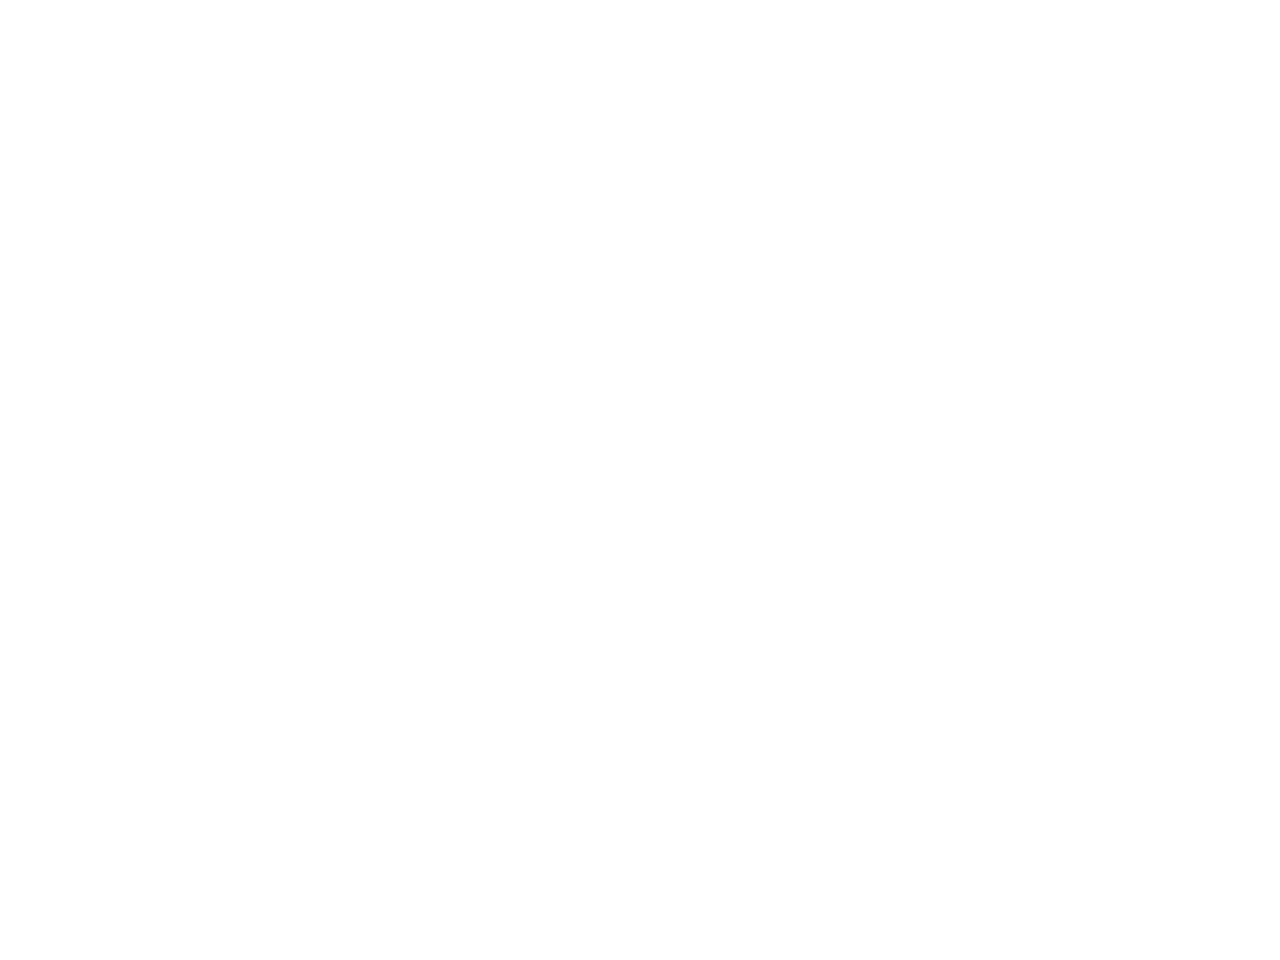

<IPython.core.display.Javascript object>


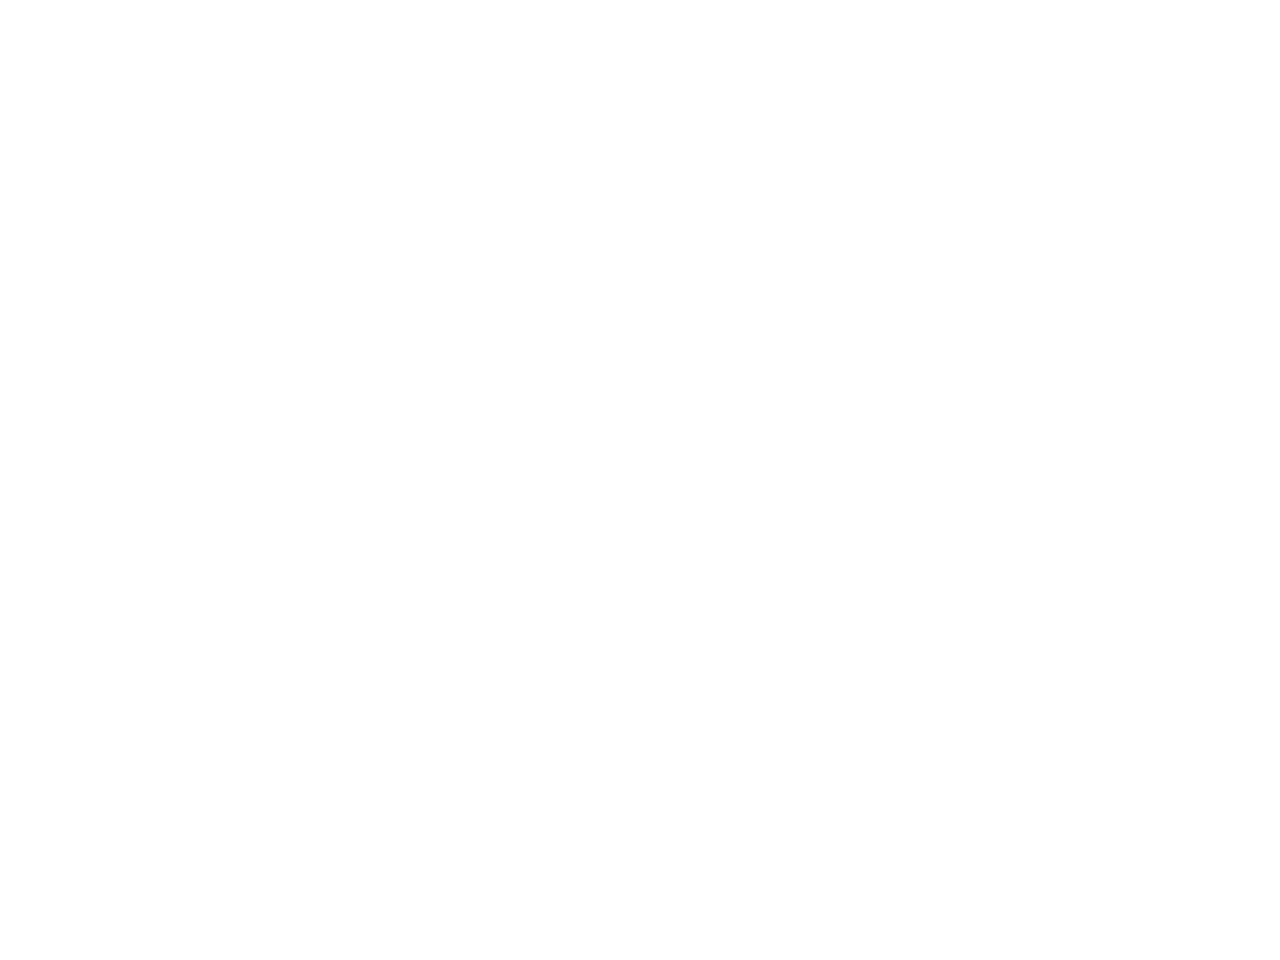

In [16]:
lam = np.arange(1000,25000,10)
times = np.arange(0,20,0.5)

for i in range(len(times)):
    fig = plt.figure()
    sed_step = check_transient4.model.flux(times[i],list(lam))
    plt.plot(lam, sed_step)
    plt.xlabel('lambda')
    plt.ylabel(r'ergs/s/cm^2')
    fig.savefig('sedpng_{0}.png'.format(str(i).zfill(3)), bbox_inches='tight')
    plt.close(fig)

In [7]:
re.split("(\d+)",'pontus2502')

['pontus', '2502', '']